# Finding Optimal Path using Q-learning

Final Value of Q matrix after training:

 [[  0.           0.           0.           0.         399.99999789
    0.        ]
 [  0.           0.           0.         319.99999892   0.
  499.99999892]
 [  0.           0.           0.         319.99999892   0.
    0.        ]
 [  0.         399.99999865 255.99999914   0.         399.99999914
    0.        ]
 [319.99999832   0.           0.         319.99999832   0.
  499.99999892]
 [  0.         399.99999865   0.           0.         399.99999789
  499.99999865]]
0 -> 4 -> 5
1 -> 5
2 -> 3 -> 4 -> 5
3 -> 4 -> 5
4 -> 5
5


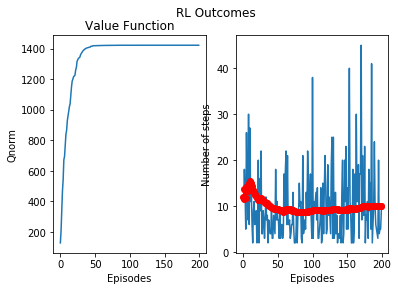

In [0]:
# Version 1
# The state can start from target position itself
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.8
maxEpisodes = 200

# initial Q values
Q = np.zeros((6,6))

allstates = np.arange(6)
allactions = np.arange(6)

# Reward for state-action matrix
R = np.array([[-1,-1,-1,-1,0,-1],
               [-1,-1,-1,0,-1,100],
               [-1,-1,-1,0,-1,-1],
               [-1,0,0,-1,0,-1],
               [0,-1,-1,0,-1,100],
               [-1,0,-1,-1,0,100]
               ])

target = 5
Qnorm = []
steps_per_episode = []
avgsteps_per_episode = []
avgsteps = 0

for episode in range(maxEpisodes):

  # start from a random state
  state = np.random.choice(np.arange(6))

  repeatFlag = True
  targetVisitCount = 0
  steps = 0;
  while repeatFlag:
    steps += 1
    reward_x = R[int(state), :]

    action = np.random.choice(allactions[reward_x >= 0])

    next_state = action  # here action is the next state

    reward_nx = R[int(next_state), :]

    Q_nx = Q[int(next_state), :]

    # max Q(x(t+1), a(t+1)) for all a(t+1)
    #MaxQ_next_state = max(Q_nx[reward_nx >= 0])

    # You can simply compute the max Q value 
    MaxQ_next_state = max(Q[int(next_state),:])

    Q[state, action] = R[state,action] + gamma * MaxQ_next_state

    # new state becomes the current state for the next iteration
    state = next_state

    if state == target:
      targetVisitCount += 1

    if targetVisitCount > 1:
      targetVisitCount = 0
      repeatFlag = False



  #print('Episode {} takes {} steps'.format(episode, steps))

  Qnorm.append(np.linalg.norm(Q))
  steps_per_episode.append(steps)
  avgsteps += steps
  avgsteps_per_episode.append(avgsteps/(episode+1))

# plot
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('RL Outcomes')
ax1.plot(Qnorm)
ax1.set(xlabel='Episodes', ylabel='Qnorm')
ax1.set_title('Value Function')
ax2.plot(steps_per_episode)
ax2.plot(avgsteps_per_episode, 'r-o')
ax2.set(xlabel='Episodes', ylabel='Number of steps')

print('Final Value of Q matrix after training:\n\n', Q)


def print_next_state(state, target, Q, arr):
  if state != target:
    arr += str(state) + ' -> '
    #  print(arr, end=' ')
    Q_x = Q[int(state), :]
    maxindex = [i for i,x in enumerate(Q_x) if x == max(Q_x)]
    #print('max_index', maxindex)
    for action in maxindex:
      next_state = action
      print_next_state(next_state, target, Q, arr)
  else:
    arr += str(state)
    print(arr)

# Final Routes
for state in allstates:
  arr = ''
  print_next_state(state, target, Q,arr)


  





Final Value of Q matrix after training:

 [[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]

--------------------

Final Paths for each starting location:
0 -> 4 -> 5
1 -> 5
2 -> 3 -> 1 -> 5
2 -> 3 -> 4 -> 5
3 -> 1 -> 5
3 -> 4 -> 5
4 -> 5
5


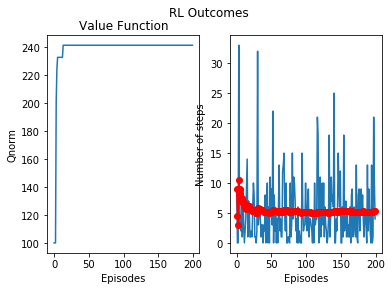

In [0]:
# Version 2
# The state does not start from target
# The last row of Q matrix is not updated.
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.8
maxEpisodes = 200

# initial Q values
Q = np.zeros((6,6))

allstates = np.arange(6)
allactions = np.arange(6)

# Reward for state-action matrix
R = np.array([[-1,-1,-1,-1,0,-1],
               [-1,-1,-1,0,-1,100],
               [-1,-1,-1,0,-1,-1],
               [-1,0,0,-1,0,-1],
               [0,-1,-1,0,-1,100],
               [-1,0,-1,-1,0,100]
               ])

target = 5
Qnorm = []
steps_per_episode = []
avgsteps_per_episode = []
avgsteps = 0

for episode in range(maxEpisodes):

  # start from a random state
  state = np.random.choice(np.arange(6))

  steps = 0;
  while state != target: 
    steps += 1
    reward_x = R[int(state), :]

    action = np.random.choice(allactions[reward_x >= 0])

    next_state = action  # here action is the next state

    reward_nx = R[int(next_state), :]

    Q_nx = Q[int(next_state), :]

    # max Q(x(t+1), a(t+1)) for all a(t+1)
    #MaxQ_next_state = max(Q_nx[reward_nx >= 0])

    # You can simply compute the max Q value 
    MaxQ_next_state = max(Q[int(next_state),:])

    Q[state, action] = R[state,action] + gamma * MaxQ_next_state

    # new state becomes the current state for the next iteration
    state = next_state



  #print('Episode {} takes {} steps'.format(episode, steps))

  Qnorm.append(np.linalg.norm(Q))
  steps_per_episode.append(steps)
  avgsteps += steps
  avgsteps_per_episode.append(avgsteps/(episode+1))

# plot
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('RL Outcomes')
ax1.plot(Qnorm)
ax1.set(xlabel='Episodes', ylabel='Qnorm')
ax1.set_title('Value Function')
ax2.plot(steps_per_episode)
ax2.plot(avgsteps_per_episode, 'r-o')
ax2.set(xlabel='Episodes', ylabel='Number of steps')

print('Final Value of Q matrix after training:\n\n', Q)

def print_next_state(state, target, Q, arr):
  if state != target:
    arr += str(state) + ' -> '
    #  print(arr, end=' ')
    Q_x = Q[int(state), :]
    maxindex = [i for i,x in enumerate(Q_x) if x == max(Q_x)]
    #print('max_index', maxindex)
    for action in maxindex:
      next_state = action
      print_next_state(next_state, target, Q, arr)
  else:
    arr += str(state)
    print(arr)


# Final Routes
print("\n--------------------\n")
print("Final Paths for each starting location:")
for state in allstates:
  arr = ''
  print_next_state(state, target, Q,arr)


  




# OpenAI Gym Display on Google Colab

- Install gym dependencies
- Record and Display video
- CartPole Problem


In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [0]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools > /dev/null 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
#import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

## Option 1 - Wrap Environment


In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [0]:
env = wrap_env(gym.make("CartPole-v0"))
env.reset()
for i_episode in range(100):
  obs = env.reset()
  t = 0
  while not done:
    env.render()
    action = env.action_space.sample()
    obs,reward,done,info = env.step(action)
    t += 1
    if done:
      print("Done after {} steps".format(t))
      break;
env.close()
show_video()

NameError: ignored

## Option 2 - Display as Animation

In [0]:
env = gym.make('CartPole-v0')
frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while t < 100:
        frames.append(env.render(mode = 'rgb_array'))
        action = env.action_space.sample()
        obs, r, done, _ = env.step(action)
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
    
#env.render()


plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), 
           dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, 
                                         frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

NameError: ignored

## Option 3: Displaying GIF over HTML


In [0]:
!apt-get update
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev ffmpeg xorg-dev python-opengl libboost-all-dev libsdl2-dev swig libffi-dev
!apt-get install -y xvfb
!pip install gym
!pip install moviepy
!pip3 install piglet
!pip3 install pyglet

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg

In [0]:
%%writefile cartpole.py
import gym
import numpy as np
from moviepy.editor import ImageSequenceClip
env = gym.make('CartPole-v0')
frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while t < 100:
        frames.append(env.render(mode = 'rgb_array'))
        action = env.action_space.sample()
        obs, r, done, _ = env.step(action)
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
    
clip = ImageSequenceClip(frames, fps=30)
clip.write_gif('result.gif', fps=30)

Overwriting cartpole.py


In [0]:
!xvfb-run -s "-screen 0 1400x900x24" python cartpole.py
!cp result.gif /usr/local/share/jupyter/nbextensions/google.colab/

test episode: 0 R: 11.0
test episode: 1 R: 18.0
test episode: 2 R: 16.0

[MoviePy] Building file result.gif with imageio
100% 300/300 [00:04<00:00, 61.56it/s]
Exception ignored in: <bound method Viewer.__del__ of <gym.envs.classic_control.rendering.Viewer object at 0x7fdd6f079358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control/rendering.py", line 152, in __del__
  File "/usr/local/lib/python3.6/dist-packages/gym/envs/classic_control/rendering.py", line 71, in close
  File "/usr/local/lib/python3.6/dist-packages/pyglet/window/xlib/__init__.py", line 480, in close
  File "/usr/local/lib/python3.6/dist-packages/pyglet/gl/xlib.py", line 345, in destroy
  File "/usr/local/lib/python3.6/dist-packages/pyglet/gl/base.py", line 334, in destroy
  File "/usr/local/lib/python3.6/dist-packages/pyglet/gl/xlib.py", line 335, in detach
  File "/usr/local/lib/python3.6/dist-packages/pyglet/gl/lib.py", line 97, in errcheck
ImportError: sys.met

In [0]:
%%html
<img src='/nbextensions/google.colab/result.gif'/>

# CartPole Problem

- Problem is to prevent the vertical bar from falling by moving the cart left or right. 
- state vector has four elements: $x$, $\dot{x}$, $\theta$, $\dot{\theta}$
- We limit the range of observation space to : `[(-4.8, 4.8), (-0.5, 0.5), (-0.42, 0.42), (-0.9, 0.9)]`
- We use a bucket size as : `(1,1,6,3)`
- action has two states: left (0) or right (1)
- continuous states (or observations) are discretized into fixed number of buckets by using the function `bucketize()` or `discretize()`
- The problem is considered solved, if the total time-step for each episode exceeds 195 consecutively for 100 episodes. 
- Dimension of Q Table is 1x1x6x3x2 
- We use an adaptive learning and exploration rate. Learning rate decreases with increasing episodes. 


## Q-Learning for CartPole Problem
- Q value is updated using the following formula:
$$Q(s,a) = Q(s,a) + \alpha [R(s,a) + \gamma \max_a Q(s',a) - Q(s,a)]$$

In [0]:
import gym
import numpy as np
import random
import math
import matplotlib.pyplot as plt

env= gym.make('CartPole-v0')

no_buckets = (1,1,6,3)
no_actions = env.action_space.n

state_value_bounds = list(zip(env.observation_space.low, 
                              env.observation_space.high))
state_value_bounds[1] = (-0.5, 0.5)
state_value_bounds[3] = (-math.radians(50), math.radians(50))

print(state_value_bounds)
print(len(state_value_bounds))
print(np.shape(state_value_bounds))
print(state_value_bounds[0][0])


action_index = len(no_buckets)   # i am not using this

# define q_value_table
q_value_table = np.zeros(no_buckets + (no_actions,))

# Q has 6 dimensions 1 x 1 x 6 x 3 x 2 
#print(q_value_table)


# user-defined parameters
min_explore_rate = 0.1
min_learning_rate = 0.1
max_episodes = 1000
max_time_steps = 250
streak_to_end = 120
solved_time = 199
discount = 0.99
no_streaks = 0

# Select an action - explore vs exploit
# epsilon-greedy method
def select_action(state_value, explore_rate):
  if random.random() < explore_rate: 
    action = env.action_space.sample()    # explore
  else:
    action = np.argmax(q_value_table[state_value])  # exploit
  return action

# change the exploration rate over time.
def select_explore_rate(x):
  return max(min_learning_rate, min(1.0, 1.0 - math.log10((x+1)/25)))

# Change learning rate over time
def select_learning_rate(x):
  return max(min_learning_rate, min(1.0, 1.0 - math.log10((x+1)/25)))

# Bucketize the state_value

def bucketize_state_value(state_value):
  #print('len(state_value):', len(state_value))
  bucket_indices = []
  for i in range(len(state_value)):
    if state_value[i] <= state_value_bounds[i][0]:   # violates lower bound
      bucket_index = 0
    elif state_value[i] >= state_value_bounds[i][1]: # violates upper bound
      bucket_index = no_buckets[i] - 1  # put in the last bucket
    else:
      bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
      offset = (no_buckets[i]-1) * state_value_bounds[i][0] / bound_width
      scaling = (no_buckets[i]-1) / bound_width
      bucket_index = int(round(scaling*state_value[i]-offset))
    
    bucket_indices.append(bucket_index)
  return(tuple(bucket_indices))


def discretize(obs):

  upper_bounds = [state_value_bounds[i][1] for i in range(len(obs))]
  lower_bounds = [state_value_bounds[i][0] for i in range(len(obs))]

  ratios = [(obs[i] + abs(lower_bounds[i]))/ 
            (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
  new_obs = [int(round((no_buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
  new_obs = [min(no_buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
  return tuple(new_obs)




[(-4.8, 4.8), (-0.5, 0.5), (-0.41887903, 0.41887903), (-0.8726646259971648, 0.8726646259971648)]
4
(4, 2)
-4.8


Episode 0 finished after 11 time steps
Episode 100 finished after 14 time steps
Episode 200 finished after 200 time steps
CartPole problem is solved after {} episodes. 294


[Text(0, 0.5, 'Learning rate'), Text(0.5, 0, 'Episodes')]

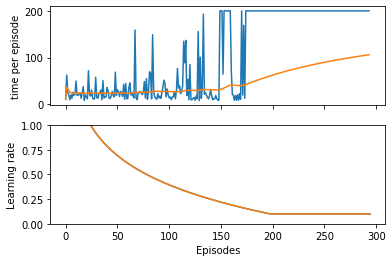

In [0]:
# %pdb on
_DEBUG = False

frames = []
reward_per_episode = []
time_per_episode = []
avgtime_per_episode = []
learning_rate_per_episode = []
explore_rate_per_episode = []


# train the system
totaltime = 0
for episode_no in range(max_episodes):

  explore_rate = select_explore_rate(episode_no)
  learning_rate = select_learning_rate(episode_no)

  learning_rate_per_episode.append(learning_rate)
  explore_rate_per_episode.append(explore_rate)

  # reset the environment while starting a new episode
  observation = env.reset()
  
  start_state_value = bucketize_state_value(observation)
  previous_state_value = start_state_value

  
  done = False 
  time_step = 0

  while not done:  
    #env.render()
    action = select_action(previous_state_value, explore_rate)
    observation, reward_gain, done, info = env.step(action)
    state_value = bucketize_state_value(observation)
    best_q_value = np.max(q_value_table[state_value])
    
    #update q_value_table
    q_value_table[previous_state_value][action] += learning_rate * (
        reward_gain + discount * best_q_value - 
        q_value_table[previous_state_value][action])

    previous_state_value = state_value

    if episode_no % 100 == 0 and _DEBUG == True:
      print('Episode number: {}'.format(episode_no))
      print('Time step: {}'.format(time_step))
      print('Previous State Value: {}'.format(previous_state_value))
      print('Selected Action: {}'.format(action))
      print('Current State: {}'.format(str(state_value)))
      print('Reward Obtained: {}'.format(reward_gain))
      print('Best Q Value: {}'.format(best_q_value))
      print('Learning rate: {}'.format(learning_rate))
      print('Explore rate: {}'.format(explore_rate))

    time_step += 1
    # while loop ends here

  if time_step >= solved_time:
    no_streaks += 1
  else:
    no_streaks = 0

  if no_streaks > streak_to_end:
    print('CartPole problem is solved after {} episodes.', episode_no)
    break
  
  # data log

  if episode_no % 100 == 0:  
    print('Episode {} finished after {} time steps'.format(episode_no, time_step))
  time_per_episode.append(time_step)
  totaltime += time_step
  avgtime_per_episode.append(totaltime/(episode_no+1))


env.close()

#show_video()

# Plotting
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(time_per_episode)
axes[0].plot(avgtime_per_episode)
axes[0].set(ylabel='time per episode')
axes[1].plot(learning_rate_per_episode)
axes[1].plot(explore_rate_per_episode)
axes[1].set_ylim([0,1])
axes[1].set(xlabel='Episodes', ylabel='Learning rate')


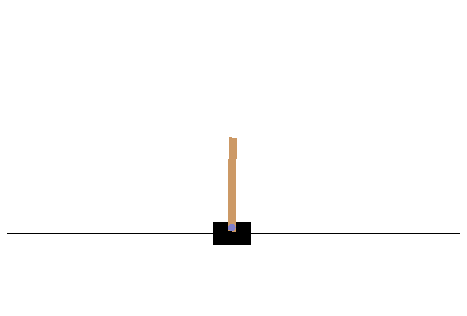

In [0]:

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

[Episode 0] - Mean survival time over last 100 episodes was 15.0 ticks
[Episode 100] - Mean survival time over last 100 episodes was 32.91 ticks
[Episode 200] - Mean survival time over last 100 episodes was 147.25 ticks
Ran 238 episodes. Solved after 138 trials


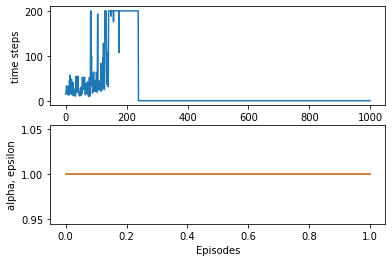

In [0]:
import gym
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt


class QCartPoleSolver():
  def __init__(self, buckets=(1,1,6,12), n_episodes=1000, n_win_ticks=195, \
               min_alpha=0.1, min_epsilon=0.1, gamma=1.0, ada_divisor=25, \
               max_env_steps=None, quiet=False, monitor=False):
  
    self.buckets = buckets
    self.n_episodes = n_episodes
    self.n_win_ticks = n_win_ticks
    self.min_alpha = min_alpha      # learning rate
    self.min_epsilon = min_epsilon  # exploration rate
    self.gamma = gamma            # discount factor
    self.ada_divisor = ada_divisor
    self.quiet = quiet

    # plotting 
    self.time_steps = np.zeros(self.n_episodes)
    self.params = np.zeros((self.n_episodes, 2)) 


    self.env = gym.make('CartPole-v0')
    if max_env_steps is not None: self.env._max_episode_steps = max_env_steps
    if monitor: gym.wrappers.Monitor(self.env, './video', force=True)

    # Initialize the Q-table to zeros
    self.Q_table = np.zeros(self.buckets + (self.env.action_space.n,))

  def discretize(self, obs):
    upper_bounds = [self.env.observation_space.high[0], 0.5, \
                    self.env.observation_space.high[2], math.radians(50)]
    lower_bounds = [self.env.observation_space.low[0], -0.5, \
                    self.env.observation_space.low[2], -math.radians(50)]
    ratios = [(obs[i] + abs(lower_bounds[i]))/ 
              (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((self.buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(self.buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)

  def choose_action(self, state, epsilon):
    if np.random.random() <= epsilon:
      action = self.env.action_space.sample()
    else:
      action = np.argmax(self.Q_table[state])
    return action

  def update_q_value(self, state, action, reward, next_state, alpha):
    self.Q_table[state][action] += alpha * (reward + self.gamma * 
              np.max(self.Q_table[next_state]) - self.Q_table[state][action])
    
  def get_epsilon(self, t):
    return max(self.min_epsilon, min(1, 1.0 - math.log10((t+1)/self.ada_divisor)))

  def get_alpha(self, t):
    return max(self.min_alpha, min(1.0, 1.0 - math.log10((t+1)/self.ada_divisor)))

  def run(self):
    scores = deque(maxlen=100)

    for e in range(self.n_episodes):
      current_state = self.discretize(self.env.reset())
      alpha = self.get_alpha(e)
      epsilon = self.get_epsilon(e)
  
      done = False
      i = 0 
      while not done:
        # self.env.render()
        action = self.choose_action(current_state, epsilon)
        obs, reward, done, _ = self.env.step(action)
        new_state = self.discretize(obs)
        self.update_q_value(current_state, action, reward, new_state, alpha)
        current_state = new_state
        i += 1
      
      self.time_steps[e] = i
      self.params[e][0] = alpha
      self.params[e][1] = epsilon

      scores.append(i)
      mean_score = np.mean(scores)
      if mean_score >= self.n_win_ticks and e>= 100:
        if not self.quiet:
          print('Ran {} episodes. Solved after {} trials'.format(e, e-100))
          return e-100
      if e % 100 == 0 and not self.quiet:
        print('[Episode {}] - Mean survival time over last 100 episodes was {} ticks'.format(e, mean_score))

    if not self.quiet:
      print('Did not solve after {} episodes '.format(e))
      return e

  def close(self):
    self.env.close()

  def draw_plots(self):

    fig,axes = plt.subplots(2,1)
    axes[0].plot(self.time_steps)
    axes[0].set(xlabel='Episodes', ylabel='time steps')
    axes[1].plot(self.params[0])
    axes[1].plot(self.params[1])
    axes[1].set(xlabel='Episodes', ylabel='alpha, epsilon')

if __name__ == "__main__":
  solver = QCartPoleSolver(monitor=True)
  solver.run()
  solver.close()
  solver.draw_plots()


## Deep Q Network for CartPole 
- Here $Q(s,a)$ is approximate using a Neural network
- It is not required to bucketize / discretize the state space. It can take continuous values as input. 
- The Q-network is trained using a method called __experience replay__. 
- The past value the Q-network is used as a target to update the weights of the Q-network. 
- Batch-update provides faster convergence compared to incremental update.

----
In the first version,
- we use the same Q-network to provide target values for the Q-update. 
- the function `replay()` provides incremental training of Q-network.  This does not converge. 
- the function `replay2()` provides batch-traing of Q-network. This converges. 


In [0]:
import random
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

EPISODES = 300

class DQNAgent:
  def __init__(self, state_size, action_size):
    self.state_size = state_size
    self.action_size = action_size
    self.memory = deque(maxlen=2000)
    self.gamma = 0.99         # discount rate
    self.epsilon = 1.0        # exploration rate
    self.epsilon_min = 0.01
    self.epsilon_decay = 0.999
    self.learning_rate = 0.001
    self.train_start = 1000
    self.model = self._build_model()

  
  def _build_model(self):
    # Neural Network for Deep-Q learning model
    model = Sequential()
    model.add(Dense(24, input_dim=self.state_size, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(self.action_size, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
    return model

  def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))

  def act(self, state):
    if np.random.random() <= self.epsilon:
      return random.randrange(self.action_size)
    else:
      q_values = self.model.predict(state)
      return np.argmax(q_values[0])   # returns action
  
  # Batch update - it is more stable compared to incremental update
  def replay2(self, batch_size):
    
    minibatch = random.sample(self.memory, batch_size)

    current_state = np.zeros((batch_size, self.state_size))
    next_state = np.zeros((batch_size, self.state_size))
    action, reward, done = [], [], []

    for i in range(batch_size):
      current_state[i] = minibatch[i][0]  
      action.append(minibatch[i][1])
      reward.append(minibatch[i][2])
      next_state[i] = minibatch[i][3]  
      done.append(minibatch[i][4])

    targetQvalue = self.model.predict(current_state) # for current state
    Qvalue_ns = self.model.predict(next_state)    # for next state

    for i in range(batch_size):
      if done[i]:
        targetQvalue[i][action[i]] = reward[i]
      else:
        targetQvalue[i][action[i]] = reward[i] + self.gamma * (
            np.amax(Qvalue_ns[i]))
        
    # train the model
    self.model.fit(current_state, targetQvalue, batch_size=batch_size,
                   epochs=1, verbose=0)
    if (self.epsilon > self.epsilon_min) and \
                  (len(self.memory) >= self.train_start):
      self.epsilon *= self.epsilon_decay
    
  # Incremental update
  # Same Q-network is used for computing reward for updating the Q-Network

  def replay(self, batch_size):
    minibatch = random.sample(self.memory, batch_size)
    for state,action,reward,next_state,done in minibatch:

      # if done make our target reward as 
      target = reward
      # else
      if not done:
        target = reward + self.gamma * \
                        np.amax(self.model.predict(next_state)[0])
      target_f = self.model.predict(state)
      target_f[0][action] = target
      self.model.fit(state, target_f, epochs=1, verbose=0)
    if (self.epsilon > self.epsilon_min) and (len(self.memory) >=self.memory.maxlen) :
    #if self.epsilon > self.epsilon_min:
      self.epsilon *= self.epsilon_decay

  def load(self, name):
    self.model.load_weights(name)

  def save(self, name):
    self.model.save_weights(name)

if __name__ == "__main__":

  # initialize the environment
  env = gym.make('CartPole-v0')
  #env.spec_max_episode_steps = 5000

  print(env.observation_space.shape)
  state_size = env.observation_space.shape[0]
  action_size = env.action_space.n 
  agent = DQNAgent(state_size, action_size)
  # agent.load("./cartpole_dqn1.h5")

  done = False 
  batch_size = 64
  score1 = []
  episode1 = []
  for e in range(EPISODES):

    state = env.reset()
    state = np.reshape(state, [1,state_size])

    done = False
    t = 0
    while not done:
      # env.render()
      action = agent.act(state)
      next_state, reward, done, _ = env.step(action)
      reward = reward if not done else -100   
      next_state = np.reshape(next_state, [1,state_size])
      
      # remember
      agent.remember(state, action, reward, next_state, done)

      state = next_state

      t += 1

      # experience replay
      if len(agent.memory) > batch_size:
        #agent.replay2(batch_size)  # batch training
        agent.replay(batch_size)   # incremental training

    print("episode: {}, score: {}, e: {:.2}, memory length: {}"\
        .format(e, t, agent.epsilon, len(agent.memory) ))
    score1.append(t)
    episode1.append(e)
    
    #if mean score for last 50 episode bigger than 195/495, stop training
    if np.mean(score1[-min(50, len(score1)):]) >= (env.spec.max_episode_steps-5):
      print('Problem is solved in {} episodes'.format(e))
      break

   # save the model 
  agent.save("./cartpole_dqn1.h5")  

# Plot
plt.plot(episode1,score1)
plt.xlabel('Episodes')
plt.ylabel('Time steps')

## Version 2.0 of DQN Algorithm for Cart Pole
- We use experience replay with batch training
- We use a separate target network to provide target values required for training the main Q network. The target network is updated at regular intervals to match with the main Q network. 
- It learns to balance the cartpole with 150 episodes. 
- Its performance is same as the previous model with batch training. See `replay2()` in the above cell. 

---
- We also provide double DQN implementation where Q network is used for action selection while Q' network is used for action evaluation.
- These capabilities are activated by setting `self.ddqn = True`.
- see functions: `experience_replay()` and `train_model2()` functions
- However the improvement is not substantial. 
- Also Polyak averaging does not work for me. Not sure if I am making any mistake here. 

max_episode_steps:  200
reward_threshold:  195.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_44 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_47 (Dense)             (None, 24)                600       
_____________________________

episode: 100, score: 125, memory length: 2000, epsilon: 0.009920974201040588
episode: 101, score: 82, memory length: 2000, epsilon: 0.009920974201040588
episode: 102, score: 102, memory length: 2000, epsilon: 0.009920974201040588
episode: 103, score: 200, memory length: 2000, epsilon: 0.009920974201040588
episode: 104, score: 63, memory length: 2000, epsilon: 0.009920974201040588
episode: 105, score: 146, memory length: 2000, epsilon: 0.009920974201040588
episode: 106, score: 67, memory length: 2000, epsilon: 0.009920974201040588
episode: 107, score: 73, memory length: 2000, epsilon: 0.009920974201040588
episode: 108, score: 67, memory length: 2000, epsilon: 0.009920974201040588
episode: 109, score: 76, memory length: 2000, epsilon: 0.009920974201040588
episode: 110, score: 61, memory length: 2000, epsilon: 0.009920974201040588
episode: 111, score: 200, memory length: 2000, epsilon: 0.009920974201040588
episode: 112, score: 80, memory length: 2000, epsilon: 0.009920974201040588
episode

episode: 207, score: 200, memory length: 2000, epsilon: 0.009920974201040588
episode: 208, score: 195, memory length: 2000, epsilon: 0.009920974201040588
episode: 209, score: 200, memory length: 2000, epsilon: 0.009920974201040588
Problem is solved in 209 episodes.


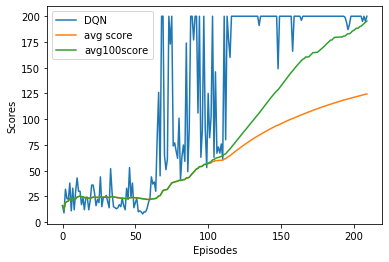

In [99]:
#%%writefile cartpole_dqn.py
import sys
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
#-------------------------------------
# frame recording
#import matplotlib.animation
# from IPython.display import HTML
# from IPython import display as ipythondisplay
# from moviepy.editor import *
#-----------------------------------------
#import pdb

EPISODES = 1000

class DQNAgent:
    def __init__(self, state_size, action_size, ddqn_flag=False):

        self.render = False
        self.load_model = False

        self.state_size = state_size
        self.action_size = action_size

        # hyper parameters for DQN
        self.discount_factor =  0.9
        self.learning_rate = 0.001
        self.epsilon = 1.0        # explore rate
        self.epsilon_decay = 0.99
        self.epsilon_min = 0.01
        self.batch_size = 24
        self.train_start = 1000


        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        self.target_model = self.build_model()

        if self.load_model:
          self.load_weights()

        self.ddqn = ddqn_flag
        if self.ddqn:
          print("------- Double DQN -------------")
        else:
          print("-----------DQN-----------------")

        # initialize target model
        self.target_model.set_weights(self.model.get_weights())

   

    # approximate Q-function with a Neural Network
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # update target model at regular interval to match the main model
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())
        
    def update_target_model2(self, tau = 0.1):
        '''
        Apply Polyak Averaging during weight update
        '''
        if self.ddqn:
            weights = self.model.get_weights()
            target_weights = self.target_model.get_weights()
            for i in range(len(target_weights)):
                target_weights[i] = weights[i] * tau + target_weights[i] * (1-tau)
                self.target_model.set_weights(target_weights)
        else:
            self.target_model.set_weights(self.model.get_weights())

       
    def save_weights(self, filename):
        self.model.save_weights(filename)
  
    def load_weights(self, filename):
        self.model.load_weights(filename)
  
    # get action from the main model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s, a, r, s'>. into replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state,action,reward,next_state,done))


  # compute Q_max

    def get_target_q_value(self, next_state, reward):

        # max Q value among the next state's action
        if self.ddqn:
            # DDQN
            # Current Q network selects the action
            # a'_max = argmax_a' Q(s',a')
            action = np.argmax(self.model.predict(next_state)[0])
            # target Q network evaluates the action
            # Q_max = Q_target(s', a'_max)
            max_q_value = self.target_model.predict(next_state)[0][action]
        else: 
            # DQN chooses the max Q value among next actions
            # Selection and evaluation of action is on the target Q network
            # Q_max = max_a' Q_target(s', a')
            max_q_value = np.amax(self.target_model.predict(next_state)[0])

        return max_q_value



    # Implementing DDQN Hasselt, 2015 Algorithm
    def experience_replay(self):

        if len(self.memory) < self.train_start:
            return

        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        state_batch, q_values_batch = [], []
        for state, action, reward, next_state, done in mini_batch:

            # q-value prediction for a given state
            q_values_cs = self.model.predict(state)

            # target q-value
            max_q_value_ns = self.get_target_q_value(next_state, reward)

            # correction on the Q value for the action used
            if done:
                q_values_cs[0][action] = reward 
            else:
                q_values_cs[0][action] = reward + \
                              self.discount_factor * max_q_value_ns

            state_batch.append(state[0])
            q_values_batch.append(q_values_cs[0])


        # train the Q network
        self.model.fit(np.array(state_batch), 
                       np.array(q_values_batch),
                       batch_size = batch_size,
                       epochs = 1,
                       verbose = 0)

        self.update_epsilon()

  


    # decrease exploration, increase exploitation
    def update_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


    # pick samples randomly from replay memory and train
    def train_model(self):
        if len(self.memory) < self.train_start:
            return

        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        current_state = np.zeros((batch_size, self.state_size))
        next_state = np.zeros((batch_size, self.state_size))
        action, reward, done = [], [], []

        for i in range(self.batch_size):
            current_state[i] = mini_batch[i][0]   # current_state
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])
            next_state[i] = mini_batch[i][3]  # next_state
            done.append(mini_batch[i][4])

        target = self.model.predict(current_state)
        Qvalue_ns = self.target_model.predict(next_state)

        for i in range(self.batch_size):
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                target[i][action[i]] = reward[i] + self.discount_factor * (
                                            np.amax(Qvalue_ns[i]))

        # train the model
        self.model.fit(current_state, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)

        self.update_epsilon()


    def train_model2(self):
        if len(self.memory) < self.train_start:
            return

        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        current_state = np.zeros((batch_size, self.state_size))
        next_state = np.zeros((batch_size, self.state_size))
        target_q_values = np.zeros((batch_size, self.action_size))
        #action, reward, done = [], [], []
        action = np.zeros(batch_size, dtype=int)
        reward = np.zeros(batch_size)
        done = np.zeros(batch_size,dtype=bool)


        for i in range(self.batch_size):
            current_state[i] = mini_batch[i][0]   # current_state
            action[i] = mini_batch[i][1]
            reward[i] = mini_batch[i][2]
            next_state[i] = mini_batch[i][3]  # next_state
            done[i] = mini_batch[i][4]

        target_q_values[i] = self.model.predict(mini_batch[i][0])[0]
        max_qvalue_ns = self.get_target_q_value(mini_batch[i][3], reward[i])

        if done[i]:
            target_q_values[i][action[i]] = reward[i]
        else:
            target_q_values[i][action[i]] = reward[i] + \
                    self.discount_factor * max_qvalue_ns

    
        # train the model
        self.model.fit(current_state, target_q_values, 
                       batch_size = self.batch_size,
                       epochs=1, verbose=0)

        self.update_epsilon()



if __name__ == "__main__":

    env = gym.make('CartPole-v0')
    #env = gym.make('CartPole-v1')
    
    print("max_episode_steps: ", env.spec.max_episode_steps)
    print("reward_threshold: ", env.spec.reward_threshold)

    #env.spec.max_episode_steps = None # removes the upper limit on scores
    #env.spec.max_episode_steps = 200
    
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    #target_update_freq = 50

    # create a DQN model
    agent = DQNAgent(state_size, action_size)

    last100Scores = deque(maxlen=100)
    avg100scores = []
    frames = []   # storing video frames
    score, episode = [], []
    avg_score = []
    for e in range(EPISODES):
        done = False
        t = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        while not done:
          
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            reward = reward if not done else -100
            
            # add <s,a,r,s'> to replay memory
            agent.append_sample(state, action, reward, next_state, done)
            
            # Train through experience replay
            #agent.train_model2()
            #agent.train_model()
            agent.experience_replay()  

            t += 1
            state = next_state

            if done:
                agent.update_target_model2() # update target model for each episode
                score.append(t)
                avg_score.append(np.mean(score))
                last100Scores.append(t)
                avg100scores.append(np.mean(last100Scores))
                episode.append(e)
                print("episode: {}, score: {}, memory length: {}, epsilon: {}"\
                        .format(e, t, len(agent.memory), agent.epsilon))
                
                with open('./data/cartpole_train_dqn_ms2k_bs24.txt', 'a+') as file:
                    file.write('{}\t {} \t {:0.2f} \t {:0.2f}\n'\
                                .format(e, t, np.mean(score), np.mean(last100Scores)))
                
                break
                

        # if mean score for last 50 episode bigger than 195/495, stop training
        if np.mean(score[-min(100, len(score)):]) >= (env.spec.max_episode_steps-5):
            print('Problem is solved in {} episodes.'.format(e))
            break

  
    # save model parameters
    agent.save_weights("./cartpole_dqn.h5")
    env.close()

    # Plot 
    plt.plot(episode, score, label='DQN')
    plt.plot(episode, avg_score, label='avg score')
    plt.plot(episode, avg100scores, label='avg100score')
    plt.xlabel("Episodes")
    plt.ylabel("Scores")
    plt.legend()
    plt.savefig('./save_graph/cartpole_dqn'+
                datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")+'.png')

  # # Write Video Frames
  # clip = ImageSequenceClip(frames, fps=30)
  # clip.write_gif('result.gif', fps=30)


    

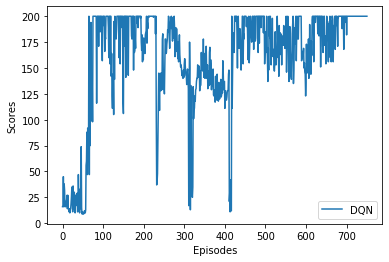

In [44]:
import matplotlib.pyplot as plt
plt.plot(episode, score, label='DQN')
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.legend()
plt.savefig('./save_graph/cartpole_dqn.png')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


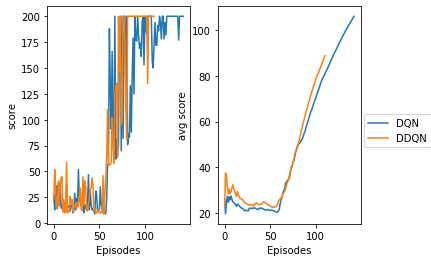

In [0]:
import matplotlib.pyplot as plt

#ddqn_scores = score

score_ddqn = [22, 16, 11, 15, 49, 14, 48, 27, 38, 15, 15, 15, 47, 19, 20, 20, 15, 35, 17, 20, 13, 16, 25, 72, 23, 37, 15, 13, 38, 30, 28, 13, 18, 9, 17, 24, 23, 13, 10, 43, 11, 24, 12, 11, 26, 10, 14, 18, 32, 117, 50, 79, 40, 49, 140, 95, 60, 115, 200, 200, 136, 121, 145, 173, 171, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 158, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 179, 166, 132, 197, 200, 200, 200, 153, 192, 104, 36, 129, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 183, 200, 178, 152, 170, 155, 158, 146, 157, 160, 128, 186, 147, 188, 153, 148, 131, 161, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 172, 163, 145, 200, 200, 200, 200, 186, 193, 196, 172, 188, 189, 195, 200, 199, 200, 200, 103, 200, 104, 200, 200, 124, 125, 177, 200, 152, 97, 106, 89, 110, 59, 82, 152, 109, 143, 92, 147, 200, 200, 200, 200, 174, 200, 200, 200, 200, 155, 132, 118, 134, 153, 187, 175, 200, 200, 200, 200, 200, 193, 200, 200, 194, 200, 200, 192, 200, 200, 196, 142, 187, 187, 200, 172, 200, 200, 200, 200, 200, 200, 200, 200, 200, 160, 188, 178, 159, 181, 200, 170, 186, 200, 200, 200, 200, 200, 194, 200, 200, 200, 200, 200, 193]
score_dqn_tpu = [31, 23, 20, 19, 59, 12, 21, 18, 25, 27, 40, 11, 29, 27, 15, 63, 13, 84, 14, 15, 25, 22, 25, 13, 15, 12, 23, 34, 19, 17, 12, 13, 23, 26, 9, 22, 15, 14, 48, 14, 11, 19, 15, 15, 15, 18, 17, 12, 11, 10, 11, 14, 18, 8, 8, 12, 11, 11, 14, 9, 8, 12, 9, 13, 20, 48, 47, 44, 34, 60, 61, 62, 92, 70, 200, 81, 200, 59, 84, 79, 52, 58, 74, 68, 118, 63, 128, 128, 134, 138, 133, 131, 200, 167, 176, 157, 200, 184, 153, 131, 157, 154, 138, 200, 200, 200, 134, 200, 166, 200, 166, 200, 200, 149, 200, 163, 178, 197, 155, 200, 105, 137, 168, 174, 132, 130, 200, 166, 179, 179, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 129, 200, 200, 200, 200, 200, 200, 192, 98, 172, 81, 17, 12, 21, 20, 30, 176, 152, 91, 78, 140, 200, 200, 200, 200, 200, 187, 105, 80, 90, 114, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 146, 125, 200, 142, 200, 200, 170, 200, 200, 200, 199, 200, 200, 200, 200, 200, 158, 200, 200, 200, 170, 199, 156, 177, 154, 167, 131, 147, 142, 122, 130, 117, 153, 153, 135, 125, 118, 126, 133, 126, 123, 129, 116, 127, 131, 125, 123, 117, 119, 124, 122, 121, 122, 121, 122, 119, 126, 120, 113, 119, 125, 112, 127, 117, 120, 112, 114, 115, 121, 120, 117, 111, 134, 119, 119, 119, 117, 121, 128, 120, 117, 144, 119, 125, 122, 117, 121, 121, 115, 116, 112, 116, 110, 111, 114, 134, 115, 120, 113, 112, 117, 111, 11, 113, 119, 36, 78, 40, 33, 59, 121, 120, 159, 117]
score_org_dqn = [11, 14, 34, 11, 18, 22, 11, 32, 25, 12, 10, 12, 31, 13, 11, 14, 14, 23, 13, 22, 15, 36, 18, 17, 71, 21, 15, 27, 21, 15, 14, 10, 14, 21, 10, 12, 15, 27, 24, 16, 18, 13, 30, 8, 15, 17, 18, 20, 17, 21, 17, 30, 15, 21, 45, 20, 11, 11, 11, 10, 16, 16, 10, 11, 15, 18, 16, 16, 18, 200, 72, 194, 200, 160, 65, 191, 92, 92, 143, 82, 200, 95, 151, 200, 200, 200, 200, 106, 108, 200, 153, 200, 183, 200, 200, 132, 200, 200, 200, 200, 200, 200, 141, 183, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 185, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 118, 200, 157, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 167, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 144, 200, 129, 154, 136, 152, 138, 149, 161, 146, 148, 142, 160, 174, 195, 200, 191, 165, 200, 200, 186, 200, 193, 200, 200, 182, 46, 11, 200, 200, 200, 200, 183, 125, 110, 200, 176, 190, 200, 200, 188, 184, 180, 200, 195, 200, 200, 200, 200, 200, 182, 135, 142, 189, 200, 166, 132, 158, 186, 200, 133, 200, 168, 145, 14, 144, 152, 172, 179, 178, 169, 172, 193, 200, 154, 200, 183, 176, 200, 200, 171, 156, 200, 200, 173, 127, 114, 200, 58, 116, 200, 129, 122, 90, 160, 157, 123, 141, 132, 141, 146, 163, 164, 145, 140, 146]

# average of last 30 >= 195
score_dqn2_tpu = [26, 13, 34, 36, 14, 39, 17, 40, 15, 14, 21, 19, 20, 11, 39, 18, 16, 15, 12, 23, 16, 10, 12, 29, 13, 24, 17, 52, 24, 21, 17, 23, 38, 10, 18, 14, 15, 19, 47, 13, 32, 17, 13, 14, 12, 9, 31, 28, 11, 12, 14, 35, 18, 13, 12, 9, 10, 9, 23, 56, 57, 188, 131, 91, 166, 88, 83, 200, 62, 81, 71, 75, 197, 200, 70, 200, 82, 200, 200, 132, 200, 76, 86, 83, 133, 88, 142, 179, 125, 200, 177, 176, 200, 183, 169, 174, 161, 195, 200, 153, 200, 187, 183, 200, 200, 200, 200, 200, 157, 150, 173, 194, 172, 172, 191, 186, 200, 194, 178, 200, 200, 178, 194, 182, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 177, 200, 200, 200, 200, 200]
dqn2_tpu_avg = average_array(score_dqn2_tpu)
score_ddqn2_tpu = [23, 52, 34, 14, 18, 41, 17, 35, 44, 45, 11, 23, 10, 13, 59, 10, 12, 11, 26, 18, 23, 11, 16, 16, 20, 14, 20, 16, 26, 34, 14, 12, 45, 17, 41, 35, 12, 12, 18, 25, 33, 34, 44, 37, 13, 14, 10, 10, 12, 13, 10, 10, 11, 10, 46, 9, 30, 43, 64, 110, 58, 56, 57, 58, 102, 75, 58, 124, 132, 135, 64, 200, 146, 200, 95, 99, 200, 200, 177, 111, 81, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 135, 200, 200, 200, 200, 200, 200, 200]
ddqn2_tpu_avg = average_array(score_ddqn2_tpu)

#average of last 50 >= 195
#print(score)

fig, axes = plt.subplots(1,2)
l1 = axes[0].plot(score_dqn2_tpu)
l2 = axes[0].plot(score_ddqn2_tpu)
axes[1].plot(dqn2_tpu_avg)
axes[1].plot(ddqn2_tpu_avg)
axes[0].set(xlabel= 'Episodes', ylabel='score')
axes[1].set(xlabel='Episodes', ylabel='avg score')
fig.legend([l1,l2],
           labels=['DQN','DDQN'],
           loc = "center right",
           borderaxespad=0.1)
plt.subplots_adjust(right=0.85)



In [0]:
def average_array(data):
  newdata = []
  sum = 0.0
  for i in range(len(data)):
    sum += data[i]
    newdata.append(sum/(i+1))
  return newdata
  

In [0]:
%debug



## Dueling DQN Algorithm
- Two deep networks are used
  - one for estimating Value function $V(s,\beta)$
  - Other for estimating advantage function $A(s,a, \alpha)$
  - Then Q function is given by using either of two formulations:
    -  $Q(s,a) = V(s,\beta) + A(s,a,\alpha) - \max_{a'} A(s,a',\alpha)$
    - $Q(s,a) = V(s, \beta) + A(s,a, \alpha) - \frac{1}{|A|}\sum_{a'} A(s,a',\alpha)$


In [101]:
import gym
import random
import numpy as np
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.utils import plot_model
from keras import backend as K
from keras import optimizers
from keras.optimizers import Adam
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from collections import deque
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
import pickle
from datetime import datetime

### Plot model ####
## not tested yet 
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
pydot = keras.utils.vis_utils.pydot 
# plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)

################
#datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")
###################

# disable deprecated warnings
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

######################### GPU Info ##########
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

# Check the GPU availability

print('TensorFlow Version: {}'.format(tf.__version__))

if tf.__version__ < "2.0":
    get_available_gpus()
else:
    device_name = tf.test.gpu_device_name()
    print(device_name)
    if device_name != '/device:GPU:0':
        raise SystemError('GPU device not found')
        print('Found GPU at: {}'.format(device_name))

#################################################

class DQNAgent:
    def __init__(self, state_size, action_size,
                memory_size = 5000,
                discount_factor = 0.9,
                learning_rate = 0.001,
                train_start = 1000,
                epsilon = 1.0, # change this if you are loading saved weights
                epsilon_decay_rate = 0.99,
                batch_size = 32,
                ddqn_flag = False,
                polyak_avg = True,
                pa_tau = 0.1,
                dueling_option = 'avg',
                load_weights_path = None,
                load_exp_path = None):

        self.state_size = state_size
        self.action_size = action_size
        self.memory_size = memory_size
        
        self.batch_size = batch_size
        self.train_start = train_start
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        self.ddqn = ddqn_flag
        self.dueling_option = dueling_option
        self.polyak_avg = polyak_avg
        self.pa_tau = pa_tau
        
        # create Replay memory
        self.memory = deque(maxlen=self.memory_size)

        # Create main model and target model
        self.model = self._build_model()
        self.target_model = self._build_model()


        if load_weights_path is not None:
            self.model.load_weights(load_weights_path)
            print('Weights loaded from File')

        if load_exp_path is not None:
            with open(load_exp_path, 'rb') as file:
                self.memory = pickle.load(file)
            print('Experience loaded from file')

        # initially both models share same weight
        self.target_model.set_weights(self.model.get_weights())
        
        
    def display_model_info(self):
        print("**------------------**")
        if self.ddqn:
            print('Double DQN with Dueling')
            if self.polyak_avg:
                print('Implements Polyak Averaging')
                print('PA Weighting factor, tau: ', self.pa_tau)
        else:
            print('DQN with Dueling')
            self.polyak_avg = False 
        print('Dueling Option: ', self.dueling_option)
        print('Batch Size: ', self.batch_size)
        print('Replay Memory size: ', self.memory_size)
        print('Learning Rate: ', self.learning_rate)
        print('Discount Factor: ', self.discount_factor)
        print('Epsilon Decay Rate: ', self.epsilon_decay_rate)
        print('Train Start: ', self.train_start)
        print("**---------------------**")


    def _build_model(self):

        # Advantage network
        network_input = Input(shape=(self.state_size,), name='network_input')
        A1 = Dense(24, activation='relu', name='A1')(network_input)
        A2 = Dense(24, activation='relu', name ='A2')(A1)
        A3 = Dense(self.action_size, activation='linear', name='A3')(A2)

        # Value network
        # V1 = Dense(24, activation='relu', name='V1')(network_input)
        #V2 = Dense(10, activation='relu', name='V2')(A2)   
        V3 = Dense(1, activation='linear', name='V3')(A2)

        if self.dueling_option == 'avg':
            network_output = Lambda(lambda x: x[0] - K.mean(x[0]) + x[1],\
                       output_shape=(self.action_size,))([A3,V3])
        elif self.dueling_option == 'max':
            network_output = Lambda(lambda x: x[0] - K.max(x[0]) + x[1],\
                       output_shape=(self.action_size,))([A3,V3])
        elif self.dueling_option == 'naive':
            network_output = Lambda(lambda x: x[0] + [1],\
                                   output_shape=(self.action_size,))([A3,V3])
        else:
            raise Exception('Invalid Dueling Option')

        model = Model(network_input, network_output)
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        model.summary()
        plot_model(model, to_file='model.png', show_shapes=True,\
                                                   show_layer_names=True)
        return model

  
    def update_target_network(self):
        ''' Implements Polyak Averaging for weight update 
            in target network
        '''
        if self.ddqn and self.polyak_avg:
            weights = self.model.get_weights()
            target_weights = self.target_model.get_weights()
            for i in range(len(target_weights)):
                target_weights[i] = weights[i] * self.pa_tau + target_weights[i] * (1-self.pa_tau)
                self.target_model.set_weights(target_weights)
        else:
            self.target_model.set_weights(self.model.get_weights())

    def update_epsilon(self):
        '''
        Reduce exploration rate over time
        '''
        if self.epsilon > 0.01:
            self.epsilon *= self.epsilon_decay_rate
        else:
            self.epsilon = 0.01

    def add_experience(self, state, action, reward, next_state, done):
        '''  Add experiences to the replay memory '''
        self.memory.append([state, action, reward, next_state, done])
        

    def select_action(self, state):
        '''Implements epsilon-greedy policy '''
        if (random.random() < self.epsilon):
            action = np.random.randint(0, self.action_size)
        else: 
            q_values = self.model.predict(state)
            action = np.argmax(q_values[0])
        return action

    def get_maxQvalue_nextstate(self, next_state):
        # max Q value among the next state's action
        if self.ddqn:
            # DDQN
            # Current Q network selects the action
            # a'_max = argmax_a' Q(s',a')
            action = np.argmax(self.model.predict(next_state)[0])
            # target Q network evaluates the action
            # Q_max = Q_target(s', a'_max)
            max_q_value = self.target_model.predict(next_state)[0][action]
        else: 
            # DQN chooses the max Q value among next actions
            # Selection and evaluation of action is on the target Q network
            # Q_max = max_a' Q_target(s', a')
            max_q_value = np.amax(self.target_model.predict(next_state)[0])

        return max_q_value

    def train_model(self):
        ''' Training on Mini-Batch with Experience Replay  '''

        if len(self.memory) < self.train_start:
            return

        mini_batch = random.sample(self.memory, self.batch_size)
        current_state = np.zeros((self.batch_size, self.state_size))
        next_state = np.zeros((self.batch_size, self.state_size))
        qValues = np.zeros((self.batch_size, self.action_size))

        #action, reward, done = [], [], []
        action = np.zeros(self.batch_size, dtype=int)
        reward = np.zeros(self.batch_size)
        done = np.zeros(self.batch_size, dtype=bool)

        for i in range(self.batch_size):
            current_state[i] = mini_batch[i][0]   # current_state
            action[i] = mini_batch[i][1]
            reward[i] = mini_batch[i][2]
            next_state[i] = mini_batch[i][3]  # next_state
            done[i] = mini_batch[i][4]

            qValues[i] = self.model.predict(\
              current_state[i].reshape(1,self.state_size))[0]
            max_qvalue_ns = self.get_maxQvalue_nextstate(\
                    next_state[i].reshape(1,self.state_size))

            if done[i]:
                qValues[i][action[i]] = reward[i]
            else:
                qValues[i][action[i]] = reward[i] + \
                        self.discount_factor * max_qvalue_ns

        # train the model
        self.model.fit(current_state, qValues, 
                       batch_size = self.batch_size,
                       epochs=1, verbose=0)

        # update epsilon with each training step
        self.update_epsilon()


  

TensorFlow Version: 1.15.0


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
network_input (InputLayer)      (None, 4)            0                                            
__________________________________________________________________________________________________
A1 (Dense)                      (None, 24)           120         network_input[0][0]              
__________________________________________________________________________________________________
A2 (Dense)                      (None, 24)           600         A1[0][0]                         
__________________________________________________________________________________________________
A3 (Dense)                      (None, 2)            50          A2[0][0]                         
__________________________________________________________________________________________________
V3 (Dense)

Episode: 47, time steps: 23, AvgScore: 20.98,                 epsilon: 0.92, replay size: 1007, Step Count: 1007
Episode: 48, time steps: 14, AvgScore: 20.84,                 epsilon: 0.80, replay size: 1021, Step Count: 1021
Episode: 49, time steps: 28, AvgScore: 20.98,                 epsilon: 0.61, replay size: 1049, Step Count: 1049
Episode: 50, time steps: 10, AvgScore: 20.76,                 epsilon: 0.55, replay size: 1059, Step Count: 1059
Episode: 51, time steps: 26, AvgScore: 20.87,                 epsilon: 0.42, replay size: 1085, Step Count: 1085
Episode: 52, time steps: 19, AvgScore: 20.83,                 epsilon: 0.35, replay size: 1104, Step Count: 1104
Episode: 53, time steps: 16, AvgScore: 20.74,                 epsilon: 0.30, replay size: 1120, Step Count: 1120
Episode: 54, time steps: 12, AvgScore: 20.58,                 epsilon: 0.26, replay size: 1132, Step Count: 1132
Episode: 55, time steps: 12, AvgScore: 20.43,                 epsilon: 0.23, replay size: 1144, 

Episode: 120, time steps: 41, AvgScore: 26.99,                 epsilon: 0.01, replay size: 3266, Step Count: 3266
Episode: 121, time steps: 26, AvgScore: 26.98,                 epsilon: 0.01, replay size: 3292, Step Count: 3292
Episode: 122, time steps: 30, AvgScore: 27.01,                 epsilon: 0.01, replay size: 3322, Step Count: 3322
Episode: 123, time steps: 31, AvgScore: 27.04,                 epsilon: 0.01, replay size: 3353, Step Count: 3353
Episode: 124, time steps: 26, AvgScore: 27.03,                 epsilon: 0.01, replay size: 3379, Step Count: 3379
Episode: 125, time steps: 33, AvgScore: 27.08,                 epsilon: 0.01, replay size: 3412, Step Count: 3412
Episode: 126, time steps: 28, AvgScore: 27.09,                 epsilon: 0.01, replay size: 3440, Step Count: 3440
Episode: 127, time steps: 38, AvgScore: 27.17,                 epsilon: 0.01, replay size: 3478, Step Count: 3478
Episode: 128, time steps: 25, AvgScore: 27.16,                 epsilon: 0.01, replay siz

Episode: 192, time steps: 24, AvgScore: 31.22,                 epsilon: 0.01, replay size: 5000, Step Count: 6025
Episode: 193, time steps: 25, AvgScore: 31.19,                 epsilon: 0.01, replay size: 5000, Step Count: 6050
Episode: 194, time steps: 32, AvgScore: 31.19,                 epsilon: 0.01, replay size: 5000, Step Count: 6082
Episode: 195, time steps: 24, AvgScore: 31.15,                 epsilon: 0.01, replay size: 5000, Step Count: 6106
Episode: 196, time steps: 37, AvgScore: 31.18,                 epsilon: 0.01, replay size: 5000, Step Count: 6143
Episode: 197, time steps: 30, AvgScore: 31.18,                 epsilon: 0.01, replay size: 5000, Step Count: 6173
Episode: 198, time steps: 41, AvgScore: 31.23,                 epsilon: 0.01, replay size: 5000, Step Count: 6214
Episode: 199, time steps: 23, AvgScore: 31.18,                 epsilon: 0.01, replay size: 5000, Step Count: 6237
Episode: 200, time steps: 45, AvgScore: 31.25,                 epsilon: 0.01, replay siz

Episode: 264, time steps: 38, AvgScore: 33.89,                 epsilon: 0.01, replay size: 5000, Step Count: 8981
Episode: 265, time steps: 68, AvgScore: 34.02,                 epsilon: 0.01, replay size: 5000, Step Count: 9049
Episode: 266, time steps: 54, AvgScore: 34.09,                 epsilon: 0.01, replay size: 5000, Step Count: 9103
Episode: 267, time steps: 104, AvgScore: 34.35,                 epsilon: 0.01, replay size: 5000, Step Count: 9207
Episode: 268, time steps: 77, AvgScore: 34.51,                 epsilon: 0.01, replay size: 5000, Step Count: 9284
Episode: 269, time steps: 57, AvgScore: 34.60,                 epsilon: 0.01, replay size: 5000, Step Count: 9341
Episode: 270, time steps: 63, AvgScore: 34.70,                 epsilon: 0.01, replay size: 5000, Step Count: 9404
Episode: 271, time steps: 66, AvgScore: 34.82,                 epsilon: 0.01, replay size: 5000, Step Count: 9470
Episode: 272, time steps: 58, AvgScore: 34.90,                 epsilon: 0.01, replay si

Episode: 336, time steps: 55, AvgScore: 39.59,                 epsilon: 0.01, replay size: 5000, Step Count: 13341
Episode: 337, time steps: 61, AvgScore: 39.65,                 epsilon: 0.01, replay size: 5000, Step Count: 13402
Episode: 338, time steps: 49, AvgScore: 39.68,                 epsilon: 0.01, replay size: 5000, Step Count: 13451
Episode: 339, time steps: 53, AvgScore: 39.72,                 epsilon: 0.01, replay size: 5000, Step Count: 13504
Episode: 340, time steps: 183, AvgScore: 40.14,                 epsilon: 0.01, replay size: 5000, Step Count: 13687
Episode: 341, time steps: 75, AvgScore: 40.24,                 epsilon: 0.01, replay size: 5000, Step Count: 13762
Episode: 342, time steps: 78, AvgScore: 40.35,                 epsilon: 0.01, replay size: 5000, Step Count: 13840
Episode: 343, time steps: 73, AvgScore: 40.44,                 epsilon: 0.01, replay size: 5000, Step Count: 13913
Episode: 344, time steps: 69, AvgScore: 40.53,                 epsilon: 0.01, r

Episode: 407, time steps: 128, AvgScore: 50.54,                 epsilon: 0.01, replay size: 5000, Step Count: 20620
Episode: 408, time steps: 101, AvgScore: 50.66,                 epsilon: 0.01, replay size: 5000, Step Count: 20721
Episode: 409, time steps: 114, AvgScore: 50.82,                 epsilon: 0.01, replay size: 5000, Step Count: 20835
Episode: 410, time steps: 136, AvgScore: 51.02,                 epsilon: 0.01, replay size: 5000, Step Count: 20971
Episode: 411, time steps: 128, AvgScore: 51.21,                 epsilon: 0.01, replay size: 5000, Step Count: 21099
Episode: 412, time steps: 117, AvgScore: 51.37,                 epsilon: 0.01, replay size: 5000, Step Count: 21216
Episode: 413, time steps: 134, AvgScore: 51.57,                 epsilon: 0.01, replay size: 5000, Step Count: 21350
Episode: 414, time steps: 115, AvgScore: 51.72,                 epsilon: 0.01, replay size: 5000, Step Count: 21465
Episode: 415, time steps: 177, AvgScore: 52.02,                 epsilon:

Episode: 478, time steps: 132, AvgScore: 61.92,                 epsilon: 0.01, replay size: 5000, Step Count: 29659
Episode: 479, time steps: 136, AvgScore: 62.07,                 epsilon: 0.01, replay size: 5000, Step Count: 29795
Episode: 480, time steps: 106, AvgScore: 62.16,                 epsilon: 0.01, replay size: 5000, Step Count: 29901
Episode: 481, time steps: 120, AvgScore: 62.28,                 epsilon: 0.01, replay size: 5000, Step Count: 30021
Episode: 482, time steps: 117, AvgScore: 62.40,                 epsilon: 0.01, replay size: 5000, Step Count: 30138
Episode: 483, time steps: 115, AvgScore: 62.51,                 epsilon: 0.01, replay size: 5000, Step Count: 30253
Episode: 484, time steps: 154, AvgScore: 62.69,                 epsilon: 0.01, replay size: 5000, Step Count: 30407
Episode: 485, time steps: 123, AvgScore: 62.82,                 epsilon: 0.01, replay size: 5000, Step Count: 30530
Episode: 486, time steps: 114, AvgScore: 62.92,                 epsilon:

Episode: 549, time steps: 133, AvgScore: 71.05,                 epsilon: 0.01, replay size: 5000, Step Count: 39075
Episode: 550, time steps: 118, AvgScore: 71.13,                 epsilon: 0.01, replay size: 5000, Step Count: 39193
Episode: 551, time steps: 137, AvgScore: 71.25,                 epsilon: 0.01, replay size: 5000, Step Count: 39330
Episode: 552, time steps: 170, AvgScore: 71.43,                 epsilon: 0.01, replay size: 5000, Step Count: 39500
Episode: 553, time steps: 127, AvgScore: 71.53,                 epsilon: 0.01, replay size: 5000, Step Count: 39627
Episode: 554, time steps: 140, AvgScore: 71.65,                 epsilon: 0.01, replay size: 5000, Step Count: 39767
Episode: 555, time steps: 132, AvgScore: 71.76,                 epsilon: 0.01, replay size: 5000, Step Count: 39899
Episode: 556, time steps: 120, AvgScore: 71.85,                 epsilon: 0.01, replay size: 5000, Step Count: 40019
Episode: 557, time steps: 135, AvgScore: 71.96,                 epsilon:

Episode: 620, time steps: 154, AvgScore: 80.11,                 epsilon: 0.01, replay size: 5000, Step Count: 49750
Episode: 621, time steps: 175, AvgScore: 80.27,                 epsilon: 0.01, replay size: 5000, Step Count: 49925
Episode: 622, time steps: 123, AvgScore: 80.33,                 epsilon: 0.01, replay size: 5000, Step Count: 50048
Episode: 623, time steps: 200, AvgScore: 80.53,                 epsilon: 0.01, replay size: 5000, Step Count: 50248
Episode: 624, time steps: 145, AvgScore: 80.63,                 epsilon: 0.01, replay size: 5000, Step Count: 50393
Episode: 625, time steps: 189, AvgScore: 80.80,                 epsilon: 0.01, replay size: 5000, Step Count: 50582
Episode: 626, time steps: 193, AvgScore: 80.98,                 epsilon: 0.01, replay size: 5000, Step Count: 50775
Episode: 627, time steps: 122, AvgScore: 81.05,                 epsilon: 0.01, replay size: 5000, Step Count: 50897
Episode: 628, time steps: 162, AvgScore: 81.17,                 epsilon:

Episode: 691, time steps: 200, AvgScore: 89.08,                 epsilon: 0.01, replay size: 5000, Step Count: 61645
Episode: 692, time steps: 200, AvgScore: 89.24,                 epsilon: 0.01, replay size: 5000, Step Count: 61845
Episode: 693, time steps: 200, AvgScore: 89.40,                 epsilon: 0.01, replay size: 5000, Step Count: 62045
Episode: 694, time steps: 153, AvgScore: 89.49,                 epsilon: 0.01, replay size: 5000, Step Count: 62198
Episode: 695, time steps: 107, AvgScore: 89.52,                 epsilon: 0.01, replay size: 5000, Step Count: 62305
Episode: 696, time steps: 200, AvgScore: 89.68,                 epsilon: 0.01, replay size: 5000, Step Count: 62505
Episode: 697, time steps: 173, AvgScore: 89.80,                 epsilon: 0.01, replay size: 5000, Step Count: 62678
Episode: 698, time steps: 171, AvgScore: 89.91,                 epsilon: 0.01, replay size: 5000, Step Count: 62849
Episode: 699, time steps: 147, AvgScore: 89.99,                 epsilon:

Episode: 762, time steps: 146, AvgScore: 96.45,                 epsilon: 0.01, replay size: 5000, Step Count: 73593
Episode: 763, time steps: 101, AvgScore: 96.46,                 epsilon: 0.01, replay size: 5000, Step Count: 73694
Episode: 764, time steps: 200, AvgScore: 96.59,                 epsilon: 0.01, replay size: 5000, Step Count: 73894
Episode: 765, time steps: 182, AvgScore: 96.70,                 epsilon: 0.01, replay size: 5000, Step Count: 74076
Episode: 766, time steps: 134, AvgScore: 96.75,                 epsilon: 0.01, replay size: 5000, Step Count: 74210
Episode: 767, time steps: 200, AvgScore: 96.89,                 epsilon: 0.01, replay size: 5000, Step Count: 74410
Episode: 768, time steps: 200, AvgScore: 97.02,                 epsilon: 0.01, replay size: 5000, Step Count: 74610
Episode: 769, time steps: 197, AvgScore: 97.15,                 epsilon: 0.01, replay size: 5000, Step Count: 74807
Episode: 770, time steps: 200, AvgScore: 97.29,                 epsilon:

Episode: 833, time steps: 133, AvgScore: 103.79,                 epsilon: 0.01, replay size: 5000, Step Count: 86559
Episode: 834, time steps: 200, AvgScore: 103.90,                 epsilon: 0.01, replay size: 5000, Step Count: 86759
Episode: 835, time steps: 79, AvgScore: 103.87,                 epsilon: 0.01, replay size: 5000, Step Count: 86838
Episode: 836, time steps: 200, AvgScore: 103.99,                 epsilon: 0.01, replay size: 5000, Step Count: 87038
Episode: 837, time steps: 128, AvgScore: 104.02,                 epsilon: 0.01, replay size: 5000, Step Count: 87166
Episode: 838, time steps: 121, AvgScore: 104.04,                 epsilon: 0.01, replay size: 5000, Step Count: 87287
Episode: 839, time steps: 200, AvgScore: 104.15,                 epsilon: 0.01, replay size: 5000, Step Count: 87487
Episode: 840, time steps: 111, AvgScore: 104.16,                 epsilon: 0.01, replay size: 5000, Step Count: 87598
Episode: 841, time steps: 200, AvgScore: 104.27,                 

Episode: 904, time steps: 200, AvgScore: 108.71,                 epsilon: 0.01, replay size: 5000, Step Count: 98384
Episode: 905, time steps: 200, AvgScore: 108.81,                 epsilon: 0.01, replay size: 5000, Step Count: 98584
Episode: 906, time steps: 165, AvgScore: 108.87,                 epsilon: 0.01, replay size: 5000, Step Count: 98749
Episode: 907, time steps: 200, AvgScore: 108.97,                 epsilon: 0.01, replay size: 5000, Step Count: 98949
Episode: 908, time steps: 200, AvgScore: 109.07,                 epsilon: 0.01, replay size: 5000, Step Count: 99149
Episode: 909, time steps: 200, AvgScore: 109.17,                 epsilon: 0.01, replay size: 5000, Step Count: 99349
Episode: 910, time steps: 118, AvgScore: 109.18,                 epsilon: 0.01, replay size: 5000, Step Count: 99467
Episode: 911, time steps: 200, AvgScore: 109.28,                 epsilon: 0.01, replay size: 5000, Step Count: 99667
Episode: 912, time steps: 200, AvgScore: 109.38,                

Episode: 974, time steps: 200, AvgScore: 111.35,                 epsilon: 0.01, replay size: 5000, Step Count: 108568
Episode: 975, time steps: 127, AvgScore: 111.37,                 epsilon: 0.01, replay size: 5000, Step Count: 108695
Episode: 976, time steps: 128, AvgScore: 111.38,                 epsilon: 0.01, replay size: 5000, Step Count: 108823
Episode: 977, time steps: 200, AvgScore: 111.48,                 epsilon: 0.01, replay size: 5000, Step Count: 109023
Episode: 978, time steps: 200, AvgScore: 111.57,                 epsilon: 0.01, replay size: 5000, Step Count: 109223
Episode: 979, time steps: 112, AvgScore: 111.57,                 epsilon: 0.01, replay size: 5000, Step Count: 109335
Episode: 980, time steps: 142, AvgScore: 111.60,                 epsilon: 0.01, replay size: 5000, Step Count: 109477
Episode: 981, time steps: 99, AvgScore: 111.58,                 epsilon: 0.01, replay size: 5000, Step Count: 109576
Episode: 982, time steps: 97, AvgScore: 111.57,          

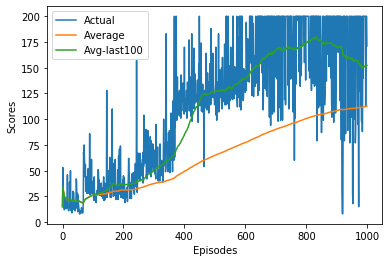

In [102]:
############

if __name__ == "__main__":

    env = gym.make('CartPole-v0')

    max_episodes = 1000 # people are running for 3000 episodes
    targetNetworkUpdateFreq = 1
    model_save_freq = 300


    last100Scores=deque(maxlen=100)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n


    # Create a DQN Agent
    deepQ = DQNAgent(state_size, action_size)
    deepQ.display_model_info()
               

    max_steps = 1
    stepCounter = 0
    Scores = []
    AvgScores = []
    Avg100Scores = []
  
    for e in range(max_episodes):

        state = env.reset().reshape(1,state_size)

        t = 0
        done = False
        while not done:
            #env.render()

            action = deepQ.select_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])

            # this is crucial for Cart Pole
            reward = reward if not done else -100

            # number of steps taken is our score
            t += 1

            # add experiences to replay memory
            deepQ.add_experience(state, action, reward, \
                               next_state, done)
            
            # training through experience replay
            deepQ.train_model()


#             if stepCounter % targetNetworkUpdateFreq == 0:
#                 deepQ.update_target_network()

            stepCounter += 1
            state = next_state
      

            if done:
            
                # update target network once for each episode
                deepQ.update_target_network()
                
                Scores.append(t)
                AvgScores.append(np.mean(Scores))
                last100Scores.append(t)
                Avg100Scores.append(np.mean(last100Scores))

                print('Episode: {}, time steps: {}, AvgScore: {:0.2f}, \
                epsilon: {:0.2f}, replay size: {}, Step Count: {}'.format(e, t, \
                                                          np.mean(Scores), 
                                                          deepQ.epsilon,
                                                          len(deepQ.memory),
                                                          stepCounter))
                # store into file
                with open('./data/cp_result_dueling_dqn_ms5k_bs32.txt', 'a+') as file2:
                #with open('/content/gdrive/My Drive/Colab_Models/cp_result.txt','a+') as file2:
                  file2.write('{}\t {} \t {:0.2f} \t {:0.2f}\t {}\n'\
                                 .format(e, t, np.mean(Scores),\
                                          np.mean(last100Scores), stepCounter))
                #print('wrote into file')
                break
    
        # while-loop ends here
        # save best models 
#         if t  > max_steps:
#             max_steps = t
#             #deepQ.model.save_weights('/content/gdrive/My Drive/Colab_Models/cp_model_steps_{}.h5'.format(t))
#             deepQ.model.save_weights('./save_model/cp_model_steps_{}.h5'.format(t))

        # save model weights
#         if e % model_save_freq == 0:
#             deepQ.model.save_weights('./save_model/cp_model_{}.h5'.format(e+1))
#         #print('Model Saved')

#         with open("./save_model/cp_exp_{}.txt".format(e),'wb') as file:
#             pickle.dump(deepQ.memory, file)

        # exit the episode loop if the mean of last 100 episodes is around 195/495
        if np.mean(last100Scores) > (env.spec.max_episode_steps-5):
            print('The problem is solved in {} episodes. Exiting'.format(e))
            break
    # episode loop ends here
    
    # plot

    plt.plot(Scores)
    plt.plot(AvgScores)
    plt.plot(Avg100Scores)
    plt.xlabel('Episodes')
    plt.ylabel('Scores')
    plt.legend(['Actual', 'Average', 'Avg-last100'])
    plt.savefig('./save_graph/Cartpole_Dueling_DQN_{}.png'\
                .format(datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")))



15.19
200


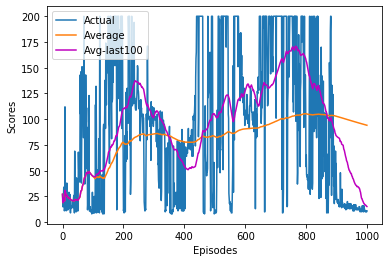

In [39]:
print(np.mean(last100Scores))
print(env.spec.max_episode_steps)


plt.plot(Scores)
plt.plot(AvgScores)
plt.plot(Avg100Scores,'m-')
plt.xlabel('Episodes')
plt.ylabel('Scores')
plt.legend(['Actual', 'Average', 'Avg-last100'])
plt.savefig('./save_graph/Cartpole_Dueling_DQN1.png')

(1000, 5)


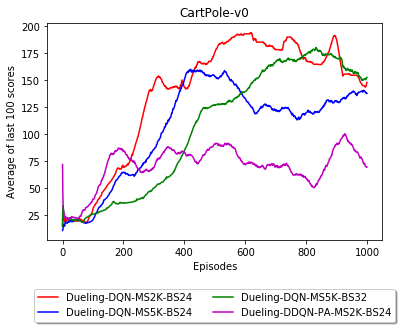

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def readFromFile(fname):
    mat = []
    file = open(fname, 'r')
    for line in file:
        fields = line.split("\t")
        cols = [float(s) for s in fields]
        mat.append(cols)
    return np.array(mat)
            
data1 = readFromFile('./data/cp_result_dueling_dqn_ms2k_bs24.txt')
data2 = readFromFile('./data/cp_result_dueling_dqn_ms5k_bs24.txt')
data3 = readFromFile('./data/cp_result_dueling_dqn_ms5k_bs32.txt')
data4 = readFromFile('./save_model/cp_result_2000_dddqn_pa.txt')
#data5 = readFromFile('./save_model/cp_result_5000_dddqn_pa.txt')
print(np.shape(data1))

plt.plot(data1[:,0], data1[:,3],'r-',label='Dueling-DQN-MS2K-BS24')
plt.plot(data2[:,0], data2[:,3],'b-', label='Dueling-DQN-MS5K-BS24')
plt.plot(data3[:,0], data3[:,3],'g-', label='Dueling-DQN-MS5K-BS32')
plt.plot(data4[:,0], data4[:,3], 'm-', label='Dueling-DDQN-PA-MS2K-BS24')
#plt.plot(data5[:,0], data5[:,3],'c-', label='Dueling-DDQN-PA-MS5K-BS24')
plt.xlabel('Episodes')
plt.ylabel('Average of last 100 scores')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)
plt.title('CartPole-v0')
plt.savefig('./save_graph/Analyzing_Dueling_DQN2.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
network_input (InputLayer)      (None, 4)            0                                            
__________________________________________________________________________________________________
A1 (Dense)                      (None, 24)           120         network_input[0][0]              
__________________________________________________________________________________________________
A2 (Dense)                      (None, 24)           600         A1[0][0]                         
__________________________________________________________________________________________________
A3 (Dense)                      (None, 2)            50          A2[0][0]                         
__________________________________________________________________________________________________
V3 (Dense)

episode: 56  steps:  9  score: 8.0   memory length: 609   epsilon: 0.009920974201040588
episode: 57  steps:  10  score: 9.0   memory length: 619   epsilon: 0.009920974201040588
episode: 58  steps:  10  score: 9.0   memory length: 629   epsilon: 0.009920974201040588
episode: 59  steps:  8  score: 7.0   memory length: 637   epsilon: 0.009920974201040588
episode: 60  steps:  8  score: 7.0   memory length: 645   epsilon: 0.009920974201040588
episode: 61  steps:  9  score: 8.0   memory length: 654   epsilon: 0.009920974201040588
episode: 62  steps:  10  score: 9.0   memory length: 664   epsilon: 0.009920974201040588
episode: 63  steps:  9  score: 8.0   memory length: 673   epsilon: 0.009920974201040588
episode: 64  steps:  8  score: 7.0   memory length: 681   epsilon: 0.009920974201040588
episode: 65  steps:  10  score: 9.0   memory length: 691   epsilon: 0.009920974201040588
episode: 66  steps:  10  score: 9.0   memory length: 701   epsilon: 0.009920974201040588
episode: 67  steps:  9  sco

episode: 148  steps:  8  score: 7.0   memory length: 1516   epsilon: 0.009920974201040588
episode: 149  steps:  10  score: 9.0   memory length: 1526   epsilon: 0.009920974201040588
episode: 150  steps:  9  score: 8.0   memory length: 1535   epsilon: 0.009920974201040588
episode: 151  steps:  10  score: 9.0   memory length: 1545   epsilon: 0.009920974201040588
episode: 152  steps:  16  score: 15.0   memory length: 1561   epsilon: 0.009920974201040588
episode: 153  steps:  10  score: 9.0   memory length: 1571   epsilon: 0.009920974201040588
episode: 154  steps:  11  score: 10.0   memory length: 1582   epsilon: 0.009920974201040588
episode: 155  steps:  10  score: 9.0   memory length: 1592   epsilon: 0.009920974201040588
episode: 156  steps:  11  score: 10.0   memory length: 1603   epsilon: 0.009920974201040588
episode: 157  steps:  10  score: 9.0   memory length: 1613   epsilon: 0.009920974201040588
episode: 158  steps:  62  score: 61.0   memory length: 1675   epsilon: 0.0099209742010405

episode: 237  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 238  steps:  11  score: 10.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 239  steps:  8  score: 7.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 240  steps:  11  score: 10.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 241  steps:  15  score: 14.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 242  steps:  14  score: 13.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 243  steps:  19  score: 18.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 244  steps:  12  score: 11.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 245  steps:  9  score: 8.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 246  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 247  steps:  9  score: 8.0   memory length: 2000   epsilon: 0.009920974201040

episode: 326  steps:  103  score: 102.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 327  steps:  96  score: 95.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 328  steps:  32  score: 31.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 329  steps:  104  score: 103.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 330  steps:  19  score: 18.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 331  steps:  18  score: 17.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 332  steps:  15  score: 14.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 333  steps:  18  score: 17.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 334  steps:  110  score: 109.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 335  steps:  36  score: 35.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 336  steps:  17  score: 16.0   memory length: 2000   epsilon: 0.0

episode: 415  steps:  9  score: 8.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 416  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 417  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 418  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 419  steps:  8  score: 7.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 420  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 421  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 422  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 423  steps:  11  score: 10.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 424  steps:  10  score: 9.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 425  steps:  22  score: 21.0   memory length: 2000   epsilon: 0.009920974201040588

episode: 503  steps:  137  score: 136.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 504  steps:  119  score: 118.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 505  steps:  120  score: 119.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 506  steps:  128  score: 127.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 507  steps:  115  score: 114.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 508  steps:  124  score: 123.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 509  steps:  112  score: 111.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 510  steps:  113  score: 112.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 511  steps:  116  score: 115.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 512  steps:  105  score: 104.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 513  steps:  103  score: 102.0   memory length: 200

episode: 591  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 592  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 593  steps:  105  score: 104.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 594  steps:  105  score: 104.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 595  steps:  101  score: 100.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 596  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 597  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 598  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 599  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 600  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 601  steps:  200  score: 199.0   memory length: 200

episode: 679  steps:  140  score: 139.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 680  steps:  148  score: 147.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 681  steps:  122  score: 121.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 682  steps:  175  score: 174.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 683  steps:  155  score: 154.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 684  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 685  steps:  159  score: 158.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 686  steps:  137  score: 136.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 687  steps:  125  score: 124.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 688  steps:  182  score: 181.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 689  steps:  141  score: 140.0   memory length: 200

episode: 767  steps:  122  score: 121.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 768  steps:  154  score: 153.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 769  steps:  140  score: 139.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 770  steps:  118  score: 117.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 771  steps:  137  score: 136.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 772  steps:  145  score: 144.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 773  steps:  157  score: 156.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 774  steps:  163  score: 162.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 775  steps:  178  score: 177.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 776  steps:  177  score: 176.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 777  steps:  157  score: 156.0   memory length: 200

episode: 855  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 856  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 857  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 858  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 859  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 860  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 861  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 862  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 863  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 864  steps:  200  score: 199.0   memory length: 2000   epsilon: 0.009920974201040588
episode: 865  steps:  200  score: 199.0   memory length: 200

SystemExit: 

/home/swagat/anaconda3/envs/tf115/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


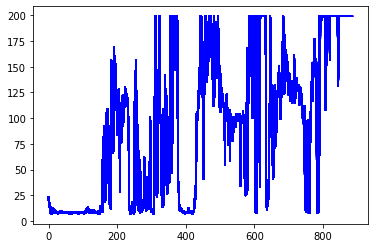

In [29]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from keras import backend as k
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Lambda, merge, Input

EPISODES = 1000


# this is Dueling DQN Agent for the Cartpole
# it uses Neural Network to approximate q function
# and replay memory & target q network
class DuelingDQNAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False

        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # these is hyper parameters for the Dueling DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.01
        self.epsilon = 1.0
        self.epsilon_decay = 0.99
        self.epsilon_min = 0.01
        self.batch_size = 24
        self.train_start = 1000
        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        self.target_model = self.build_model()

        # copy the model to target model
        # --> initialize the target model so that the parameters of model & target model to be same
        self.update_target_model()

    # the key point of Dueling network
    # the network devided into two streams, 1. value function 2. advantaget function
    # at the end of network, two streams are merged into one output stream which is Q function
    
    def build_model(self):

        # Advantage network
        network_input = Input(shape=(self.state_size,), name='network_input')
        A1 = Dense(24, activation='relu', name='A1')(network_input)
        A2 = Dense(24, activation='relu', name ='A2')(A1)
        A3 = Dense(self.action_size, activation='linear', name='A3')(A2)

        # Value network
        #V1 = Dense(24, activation='relu', name='V1')(network_input)
        #V2 = Dense(10, activation='relu', name='V2')(V1)
        V3 = Dense(1, activation='linear', name='V3')(A2)

        #if self.dueling_option == 'avg':
        network_output = Lambda(lambda x: x[0] - k.mean(x[0]) + x[1],\
                       output_shape=(self.action_size,))([A3,V3])
    #     elif self.dueling_option == 'max':
#       network_output = Lambda(lambda x: x[0] - K.max(x[0]) + x[1],\
#                    output_shape=(self.action_size,))([A3,V3])
#     else:
#       raise Exception('Invalid Dueling Option')

        model = Model(network_input, network_output)
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        model.summary()
        #plot_model(model, show_shapes=True)
        return model

  
#     def build_model(self):
#         input = Input(shape=(self.state_size,))
#         x = Dense(32, input_shape=(self.state_size,), activation='relu', kernel_initializer='he_uniform')(input)
#         x = Dense(16, activation='relu', kernel_initializer='he_uniform')(x)

#         state_value = Dense(1, kernel_initializer='he_uniform')(x)
#         state_value = Lambda(lambda s: k.expand_dims(s[:, 0], -1), output_shape=(self.action_size,))(state_value)

#         action_advantage = Dense(self.action_size, kernel_initializer='he_uniform')(x)
#         action_advantage = Lambda(lambda a: a[:, :] - k.mean(a[:, :], keepdims=True),
#                                   output_shape=(self.action_size,))(action_advantage)

#         q_value = merge([state_value, action_advantage], mode='sum')
#         model = Model(input=input, output=q_value)
#         model.summary()
#         model.compile(loss='mse', optimizer=Adam(self.learning_rate))
#         return model

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

        # get action from model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s,a,r,s'> to the replay memory
    def replay_memory(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    # pick samples randomly from replay memory (with batch_size)
    def train_replay(self):
        if len(self.memory) < self.train_start:
            return
        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        update_input = np.zeros((batch_size, self.state_size))
        update_target = np.zeros((batch_size, self.action_size))

        for i in range(batch_size):
            state, action, reward, next_state, done = mini_batch[i]
            target = self.model.predict(state)[0]

            # like Q Learning, get maximum Q value at s'
            # But from target model
            if done:
                target[action] = reward
            else:
                target[action] = reward + self.discount_factor * \
                                          np.amax(self.target_model.predict(next_state)[0])

            update_input[i] = state
            update_target[i] = target

        # make minibatch which includes target q value and predicted q value
        # and do the model fit!
        self.model.fit(update_input, update_target, batch_size=batch_size, epochs=1, verbose=0)

    # load the saved model
    def load_model(self, name):
        self.model.load_weights(name)

    # save the model which is under training
    def save_model(self, name):
        self.model.save_weights(name)


if __name__ == "__main__":
    # in case of CartPole-v1, you can play until 500 time step
    # env = gym.make('CartPole-v1')
    env = gym.make('CartPole-v0')
    
    #max_reward = 499  for v1 and 199 for v0
    max_reward = env.spec.max_episode_steps
    
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    agent = DuelingDQNAgent(state_size, action_size)

    scores, episodes = [], []
    avg_score = []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        # agent.load_model("./save_model/cartpole-master.h5")
        
        t = 0
        while not done:
            if agent.render:
                env.render()

            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # if an action make the episode end, then gives penalty of -100
            reward = reward if not done or score >= max_reward else -100

            # save the sample <s, a, r, s'> to the replay memory
            agent.replay_memory(state, action, reward, next_state, done)
            # every time step do the training
            agent.train_replay()
            score += reward
            state = next_state
            t += 1 

            if done:
                env.reset()
                
                # every episode update the target model to be same with model
                agent.update_target_model()
                
                # every episode, plot the play time
                score = score if score >= max_reward else score + 100
                scores.append(score)
                avg_score.append(np.mean(scores))
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.plot(episodes, avg_score,'r')
                pylab.savefig("./save_graph/Cartpole_Dueling_DQN.png")
                print("episode:", e, " steps: ", t, " Avg score:", np.mean(scores),\
                      "  memory length:", len(agent.memory),\
                      "  epsilon:", agent.epsilon)
                
                with open('./data/cp_duel_dqn.txt', 'a+') as file2:
                    file2.write('{}\t {} \t {:0.2f} \t {:0.2f}\t {}\n'\
                                 .format(e, t, np.mean(Scores),\
                                          deepQ.epsilon, stepCounter))
                #print('wrote into file')
                break

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                if np.mean(scores[-min(100, len(scores)):]) > (max_reward-5):
                    print('Problem is Solved in {} episodes'.format(e))
                    sys.exit()

        # save the model
        if e % 50 == 0:
            agent.save_model("./save_model/Cartpole_DQN.h5")

In [27]:
%tb


SystemExit: 

In [0]:
%%writefile cartpole.py
import cartpole_dqn
from cartpole_dqn import DQNAgent
import sys
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.animation
from IPython.display import HTML
from IPython import display as ipythondisplay
from moviepy.editor import *

# Test Run

env = gym.make('CartPole-v0')

state_size = env.observation_space.shape[0]
action_size = env.action_space.n

agent = DQNAgent(state_size, action_size)
agent.model.load_weights("./cartpole_dqn.h5")


for e in range(4):

  state = env.reset()
  state = np.reshape(state, [1, state_size])
  done = False
  frames = []
  tclip_list = []
  t = 0
  while not done:
    frames.append(env.render(mode = 'rgb_array'))
    txt_clip=TextClip(str(t),color='black').set_pos("center")
    tclip_list.append(txt_clip)
    action = agent.get_action(state)
    next_state, reward, done, info = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    t += 1

  print('Episodes ends in {} steps'.format(t))

env.close()
clip2 = ImageSequenceClip(frames, fps=30)
textclip = concatenate(tclip_list, method = "compose")
final_clip = CompositeVideoClip([clip2, textclip])
final_clip.write_gif('result.gif', fps=30)


Overwriting cartpole.py


In [0]:
!xvfb-run -s "-screen 0 1400x900x24" python cartpole.py
!cp result.gif /usr/local/share/jupyter/nbextensions/google.colab/

In [0]:
%%html
<img src='/nbextensions/google.colab/result.gif'/>

In [0]:
from google.colab import files  # To download gif output.
files.download('result.gif')

In [0]:
!ls
!du -hs cartpole_dqn.h5


cartpole_dqn.h5  cartpole_dqn.py  __pycache__  sample_data
cartpole.dqn.h5  cartpole.py	  result.gif   video
20K	cartpole.dqn.h5


In [0]:
!cd
!rm -rf sample_data/

# Frozen Lake Problem


In [0]:
import gym
import numpy as np
env = gym.make('FrozenLake-v0')


In [0]:
# Rendering of the environment
env = gym.make("FrozenLake-v0")
env.reset()
for i_episode in range(2):
  obs = env.reset()
  t = 0
  done = False
  while not done:
    t += 1
    env.render()
    action = env.action_space.sample()
    obs,reward,done,info = env.step(action)
    if done:
      print("Done after {} steps".format(t))
      break;
env.close()



SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Done after 4 steps

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Done after 2 steps


In [0]:
print(env.observation_space.n)
print(env.action_space.n)

for s in range(env.observation_space.n):
  for a in range(env.action_space.n):
    print(env.P[s][a], end =' ')
  print('')


16
4
[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)] [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)] [(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)] [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)] 
[(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)] [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)] [(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False)] [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)] 
[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 6, 0

## Value Iteration
1. We initialize random value function for each state: $V(s)$
2. Compute $Q$ function for all state-action pairs: $Q(s,a)$
3. Then we update our value function: $V(s) = \displaystyle \max_a Q(s,a)$
4. repeat the above steps until convergence: $|V_k - V_{k-1}| < \epsilon$

In [0]:
# Function definitions

# Value Iteration 
def value_iteration(env, gamma = 1.0):
  value_table = np.zeros(env.observation_space.n)
  no_of_iterations = 100000
  threshold = 1e-20
  for i in range(no_of_iterations):
    updated_value_table = np.copy(value_table)
    for state in range(env.observation_space.n):
      Q_value = []
      for action in range(env.action_space.n):
        next_state_rewards = []
        for next_sr in env.P[state][action]:
          trans_prob, next_state, reward_prob, _ = next_sr
          next_state_rewards.append((trans_prob * (reward_prob + 
                                 gamma * updated_value_table[next_state])))
        Q_value.append(np.sum(next_state_rewards))
      value_table[state] = max(Q_value)
    if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
      print('Value-Iteration Converged at iteration {}'.format(i+1))
      break
  return value_table

# Extract Policy
def extract_policy (value_table, gamma = 1.0):
  policy = np.zeros(env.observation_space.n) # policy for each state
  for state in range(env.observation_space.n):
    Q_table = np.zeros(env.action_space.n) 
    for action in range(env.action_space.n):
      for next_sr in env.P[state][action]:
        trans_prob, next_state, reward_prob, _ = next_sr 
        Q_table[action] += (trans_prob * (reward_prob + gamma * 
                                          value_table[next_state]))
    policy[state] = np.argmax(Q_table)
  return policy 




In [0]:
optimal_value_function = value_iteration(env=env, gamma=1.0)
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)
print(optimal_policy)

Value-Iteration Converged at iteration 1373
[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


## Policy Iteration
1. Initialize each state with a random policy: $\pi(s)$
2. Compute value function for this random policy and evaluate if it is optimal - policy evaluation
3. If it is not optimal, find a new improved policy - Policy improvement
4. Repeat until convergence

In [0]:
# Policy Iteration

def compute_value_function(policy, gamma = 1.0):
  value_table = np.zeros(env.observation_space.n)
  threshold = 1e-10
  while True:
    updated_value_table = np.copy(value_table)
    for state in range(env.observation_space.n):
      action = policy[state]
      value_table[state] = sum([trans_prob *  (reward_prob + 
            gamma * updated_value_table[next_state]) for 
            trans_prob, next_state, reward_prob, _ in env.P[state][action]])
    if(np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
      break
  return value_table

def policy_iteration(env, gamma=1.0):
  random_policy = np.zeros(env.observation_space.n) # initialized to zero
  no_of_iterations = 100000
  for i in range(no_of_iterations):
    new_value_function = compute_value_function(random_policy, gamma)
    new_policy = extract_policy(new_value_function, gamma)
    if (np.all(random_policy == new_policy)):
      print('Policy Iteration Converges at step {}'.format(i+1))
      break
    random_policy = new_policy
  return new_policy


# Testing policy iteration
print(policy_iteration(env))
  

Policy Iteration Converges at step 7
[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


# Taxi-Problem
- The agent is the driver
- Four locations
- Driver has to pick up at one location and drop at another.
- Agent receives +20 for successful drop off and -1 for every time step it takes.
- Agent gets -10 points for illegal pickups and drops.
- Goal of the agent is to learn to pick up and drop off passengers at correct location in a short time without adding illegal passengers.


In [0]:
import gym
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

env = gym.make('Taxi-v3')
env.render()
print(env.observation_space.n)
print(env.action_space.n)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

500
6


Avg steps for last 200 episodes 14.965
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R:_| : :G|
| : | : : 

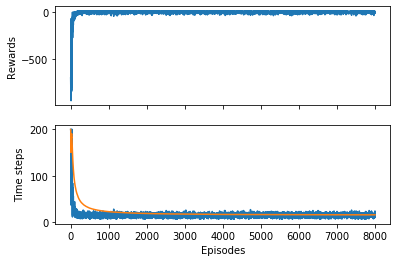

In [0]:
class QAgent:

  def __init__(self, env=None, min_alpha = 0.1, gamma = 0.99, min_epsilon=0.1, 
               max_episodes=8000,\
               ada_divisor = 25):
    if env is not None:
      self.env = env
    else:
      raise ValueError('A valid GYM environment must be passed.')
    
    self.min_alpha = min_alpha     # min learning rate (0,1)
    self.gamma = gamma              # discount factor (0,1)
    self.min_epsilon = min_epsilon    # min exploration rate (0,1)
    self.max_episodes = max_episodes
    self.ada_divisor = ada_divisor    # adaptive divisor 
    self.reward_episode = []
    self.time_episode = []
    self.avgtime = []

    # Q-table is a dictionary of state, action pair
    # Q(s,a) = Q(s,a) + alpha(r + gamma * max_a' Q(s',a') - Q(s,a))

    self.q = {}
    for s in range(self.env.observation_space.n):
      for a in range(self.env.action_space.n):
        self.q[(s,a)] = 0.0

  def get_epsilon(self, t):
    return max(self.min_epsilon, min(1, 1.0 - math.log10((t+1)/self.ada_divisor)))

  def get_alpha(self, t):
    return max(self.min_alpha, min(1.0, 1.0 - math.log10((t+1)/self.ada_divisor)))

  def update_q_table(self, state, action, reward, next_state, alpha):
    qmax_a = max([q[(next_state, a)] for a in range(env.action_space.n)])
    q[(state, action)] += alpha * (reward + self.gamma * qmax_a - q[(state, action)])
  
  # epsilon-greedy policy
  def select_action(self, state, epsilon):
    if random.uniform(0,1) < epsilon:
      return self.env.action_space.sample()
    else:
      # choose the action with maximum q value for the current state
      return max(list(range(env.action_space.n)), key=(lambda k: q[(state,k)]))
  

  def train(self):
    score = deque(maxlen=200)
    totaltime = 0
    for e in range(self.max_episodes):

      alpha = self.get_epsilon(e)
      epsilon = self.get_epsilon(e)

      # initialize the environment
      state = self.env.reset()
      
      t = 0
      r = 0
      while True:
        action = self.select_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        self.update_q_table(state, action, reward, next_state, alpha)
        state = next_state

        r += reward
        t += 1

        if done:
          break
      self.reward_episode.append(r)
      self.time_episode.append(t)
      totaltime += t
      self.avgtime.append(totaltime/(e+1))
      score.append(t)
    return np.mean(score)
      

  def plot_graphs(self):

    fig,axes = plt.subplots(2,1,sharex=True)
    axes[0].plot(self.reward_episode)
    axes[0].set(ylabel='Rewards')
    axes[1].plot(self.time_episode)
    axes[1].plot(self.avgtime)
    axes[1].set(xlabel="Episodes", ylabel='Time steps')
    

  def test(self):

    state = self.env.reset()
    t = 0
    while True:
      self.env.render()
      action = self.select_action(state, 0)
      next_state, reward, done, _ = env.step(action)
      state = next_state

      t += 1

      if done:
        print('Episode ends in {} steps.'.format(t))
        break
  

  
env = gym.make("Taxi-v3")
Agent = QAgent(env)
print('Avg steps for last 200 episodes',Agent.train())
Agent.plot_graphs()
Agent.test()

env.close()

# Mountain Car
- It has two states:
  - car's position $x$
  - car's velocity $\dot{x}$
- It has three actions: 
  - positive: move forward
  - negative: move backward
  - zero: no motion
- It gets a reward of -1 everytime it fails to reach its goal (flag position)
- Each episode consists of 200 steps and leading to a total reward of -200 in the beginning. 
- The aim is to learn to achieve the goal in less than 200 steps. Lesser the number of steps taken, better is the algorithm. 

- We demonstrate working of following concepts
  - DQN with experience replay
  - Double DQN with Polyak Averaging

In [0]:
import gym
env = gym.make('MountainCar-v0')

print('state_space_size: {}'.format(env.observation_space.shape))
print('action_space_size: {}'.format(env.action_space.n))

for e in range(5): 
  obs = env.reset()
  done = False
  score = 0
  t = 0
  while not done:
    env.render()
    action = env.action_space.sample()
    next_obs, reward, done, _ = env.step(action)
    score += reward
    t += 1
    obs = next_obs

    if done:
      print('Episode: {}, Length: {}, score: {}'.format(e, t, score))
      break
env.close()


state_space_size: (2,)
action_space_size: 3


NameError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import gym
import random
import numpy as np
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import Adam
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from collections import deque
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
import pickle

# disable deprecated warnings
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

# Check the GPU availability

print('TensorFlow Version: {}'.format(tf.__version__))

if tf.__version__ < "2.0":
  get_available_gpus()
else:
  device_name = tf.test.gpu_device_name()
  print(device_name)
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Found GPU at: {}'.format(device_name))



class DQNAgent:
  def __init__(self, state_size, action_size,
               memorySize = 20000,
               discountFactor = 0.95,
               learningRate = 0.001,
               trainStart = 1000,
               epsilon = 1.0, # change this if you are loading saved weights
               epsilon_decay_rate = 0.99,
               ddqn_flag = True,
               load_weights_path = None,
               load_exp_path = None):
    
    self.state_size = state_size
    self.action_size = action_size
    self.memory = deque(maxlen=memorySize)
    self.trainStart = trainStart
    self.learningRate = learningRate
    self.discountFactor = discountFactor
    self.epsilon = epsilon
    self.epsilon_decay_rate = epsilon_decay_rate
    self.ddqn = ddqn_flag

    self.model = self._build_model()
    self.target_model = self._build_model()

    if load_weights_path is not None:
      self.model.load_weights(load_weights_path)
      print('Weights loaded from File')

    if load_exp_path is not None:
      with open(load_exp_path, 'rb') as file:
        self.memory = pickle.load(file)
      print('Experience loaded from file')
      
    # initially both models share same weight
    self.target_model.set_weights(self.model.get_weights())

  
  def _build_model(self):
    model = Sequential()
    model.add(Dense(30, input_dim=self.state_size, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(self.action_size, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer=Adam(lr=self.learningRate))
    return model

  def update_target_network(self):
    ''' Simply copy the weights from original model'''
    self.target_model.set_weights(self.model.get_weights())

  def update_target_network2(self, tau=0.1):
    ''' Implements Polyak Averaging for weight update 
        in target network
    '''
    if self.ddqn:
      weights = self.model.get_weights()
      target_weights = self.target_model.get_weights()
      for i in range(len(target_weights)):
        target_weights[i] = weights[i] * tau + target_weights[i] * (1-tau)
      self.target_model.set_weights(target_weights)
    else:
      self.target_model.set_weights(self.model.get_weights())

  def update_epsilon(self):
    '''
    Reduce exploration rate over time
    '''
    if self.epsilon > 0.01:
      self.epsilon *= self.epsilon_decay_rate
    else:
      self.epsilon = 0.01

  def add_experience(self, state, action, reward, next_state, done):
    '''  Add experiences to the replay memory '''
    self.memory.append([state, action, reward, next_state, done])

  def select_action(self, state):
    '''Implements epsilon-greedy policy '''
    if (random.random() < self.epsilon):
      action = np.random.randint(0, self.action_size)
    else: 
      q_values = self.model.predict(state)
      action = np.argmax(q_values[0])
    return action

  def get_maxQvalue_nextstate(self, next_state):
    # max Q value among the next state's action
    if self.ddqn:
      # DDQN
      # Current Q network selects the action
      # a'_max = argmax_a' Q(s',a')
      action = np.argmax(self.model.predict(next_state)[0])
      # target Q network evaluates the action
      # Q_max = Q_target(s', a'_max)
      max_q_value = self.target_model.predict(next_state)[0][action]
    else: 
      # DQN chooses the max Q value among next actions
      # Selection and evaluation of action is on the target Q network
      # Q_max = max_a' Q_target(s', a')
      max_q_value = np.amax(self.target_model.predict(next_state)[0])

    return max_q_value

  def train_model(self, batch_size):
    ''' Training on Mini-Batch with Experience Replay  '''

    if len(self.memory) < batch_size:
      return

    mini_batch = random.sample(self.memory, batch_size)
    current_state = np.zeros((batch_size, self.state_size))
    next_state = np.zeros((batch_size, self.state_size))
    qValues = np.zeros((batch_size, self.action_size))
  
    #action, reward, done = [], [], []
    action = np.zeros(batch_size, dtype=int)
    reward = np.zeros(batch_size)
    done = np.zeros(batch_size, dtype=bool)

    for i in range(batch_size):
      current_state[i] = mini_batch[i][0]   # current_state
      action[i] = mini_batch[i][1]
      reward[i] = mini_batch[i][2]
      next_state[i] = mini_batch[i][3]  # next_state
      done[i] = mini_batch[i][4]

      qValues[i] = self.model.predict(\
          current_state[i].reshape(1,self.state_size))[0]
      max_qvalue_ns = self.get_maxQvalue_nextstate(\
                next_state[i].reshape(1,self.state_size))

      if done[i]:
        qValues[i][action[i]] = reward[i]
      else:
        qValues[i][action[i]] = reward[i] + \
                    self.discountFactor * max_qvalue_ns

    # train the model
    self.model.fit(current_state, qValues, 
                   batch_size = batch_size,
                   epochs=1, verbose=0)
    
    # update epsilon with each training step
    self.update_epsilon()

############

if __name__ == "__main__":

  env = gym.make('MountainCar-v0')

  maxEpochs = 2000 # people are running for 3000 episodes
  maxSteps = 201 
  targetNetworkUpdateFreq = 10 # make it 10
  batch_size = 64
  train_start = 1000
  model_save_freq = 100
  

  last100Scores=deque(maxlen=100)
  state_size = env.observation_space.shape[0]
  action_size = env.action_space.n


  # Create a DQN Agent
  deepQ = DQNAgent(state_size, action_size,
                   trainStart = train_start)

  min_steps = 199
  stepCounter = 0
  Scores = []
  AvgScores = []
  carPositions = []
  Avg100Scores = []
  epoch = 0
  while epoch < maxEpochs:

    state = env.reset().reshape(1,state_size)
  
    score = 0
    for t in range(maxSteps):
      #env.render()
      
      action = deepQ.select_action(state)
      next_state, reward, done, info = env.step(action)
      next_state = np.reshape(next_state, [1, state_size])
      #reward = reward if not done else -20 # not tested yt

      if next_state[0][0] >= 0.5:
        reward += 20

      # number of steps taken is our score
      score += 1
      
      # add experiences to replay memory
      deepQ.add_experience(state, action, reward, \
                           next_state, done)

      # experience replay - training
      if stepCounter > train_start: 
        deepQ.train_model(batch_size)

        if stepCounter % targetNetworkUpdateFreq == 0:
          deepQ.update_target_network()

      stepCounter += 1
      state = next_state
      

      if done:
        Scores.append(score)
        AvgScores.append(np.mean(Scores))
        last100Scores.append(score)
        Avg100Scores.append(np.mean(last100Scores))

        print('Episode: {}, time steps: {}, score: {}, AvgScore: {:0.2f}, \
        epsilon: {:0.2f}, replay size: {}, Step Count: {}'.format(epoch, t, score, \
                                                  np.mean(Scores), 
                                                  deepQ.epsilon,
                                                  len(deepQ.memory),
                                                  stepCounter))
        # store into file
        with open('/content/gdrive/My Drive/Colab_Models/result.txt','a+') as file2:
          file2.write('{}\t {} \t {} \t {:0.2f} \t {:0.2f}\t {}\n'\
                         .format(epoch, t, score, np.mean(Scores),\
                                  deepQ.epsilon, stepCounter))
        #print('wrote into file')
        break
    
    # time-step for-loop ends here
    # save best models 
    if t < min_steps:
      min_steps = t
      deepQ.model.save_weights('/content/gdrive/My Drive/Colab_Models/model_steps_{}.h5'.format(t))
 
    # record car position at the end of each episode
    carPositions.append(state[0][0])

    # update epoch count
    epoch += 1

    # save model weights
    if epoch % model_save_freq == 0:
      deepQ.model.save_weights('/content/gdrive/My Drive/Colab_Models/model_{}.h5'.format(epoch))
      #deepQ.model.save_weights('model_{}.h5'.format(epoch+1))
      #print('Model Saved')

      with open("/content/gdrive/My Drive/Colab_Models/exp_{}.txt"\
                .format(epoch), 'wb') as file:
            pickle.dump(deepQ.memory, file)
  # episode loop ends here
    
  # plot
  fig,axes = plt.subplots(2,sharex=True)
  axes[0].plot(Scores)
  axes[0].plot(AvgScores)
  axes[0].set(xlabel='Episodes', ylabel='Scores')
  axes[0].legend(['Actual', 'Average'])
  axes[1].plot(carPositions)
  axes[1].set(ylabel='Car Positions')
    

  

Using TensorFlow backend.


TensorFlow Version: 1.15.0



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 183       
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 60)                1860      

In [0]:
%debug

In [0]:
env = gym.make('MountainCar-v0')

maxSteps = 200
# Create a DQN Agent
deepQ = DQNAgent(state_size, action_size,
                 epsilon = 0.01,
                 ddqn_flag = True,
                 load_weights_path='/content/gdrive/My Drive/Colab_Models/model_100.h5',
                 load_exp_path='/content/gdrive/My Drive/Colab_Models/exp_100.txt')


state = env.reset().reshape(1,state_size)

score = 0
for t in range(maxSteps):
  env.render()
  action = deepQ.select_action(state)
  next_state, reward, done, info = env.step(action)
  next_state = np.reshape(next_state, [1, state_size])
  
  # number of steps taken is our score
  score += reward
  state = next_state
      

  if done:
    print('Score: {}'.format(score)
    break;
env.close()


[Text(0, 0.5, 'Car Positions')]

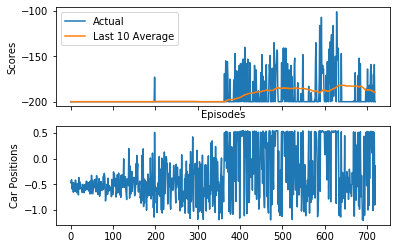

In [0]:
 # plot
fig,axes = plt.subplots(2,1,sharex=True)
axes[0].plot(Scores)
axes[0].plot(Avg100Scores)
axes[0].set(xlabel='Episodes', ylabel='Scores')
axes[0].legend(['Actual', 'Last 100 Average'])
axes[1].plot(carPositions)
axes[1].set(ylabel='Car Positions')



In [0]:
!mkdir /content/gdrive/My\ Drive/Colab_Models

In [0]:
!ls /content/gdrive/My\ Drive

Colab_Models		 Review1507.txt.gdoc
Edge-Hill		 Review1509.txt.gdoc
EPSRC-Project-i2WB.gdoc  Ro-MAN2019-TransLearn-WS-Paper-Upload
Oxford_Data
